## <font color='goldenrod'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

- Identify factors that contribute to loan default.
- Build a multiple classification models to predict loan default".
- Check for the assumptions of your models as well as perform k-fold (k=10) cross-validation while challenging your solution

### b) Formulating the Benchmark of Success

**The project’s objective is to estimate when a person will default on their loan. We construct a model that incorporates all the relevant data to reliably predict the outcome.**

**Loan defaulting occurs when a person does not fulfill their debt obligation in the specified period. A loan is considered to be in default for risk modelling purposes if it is more than 90 days old.**

**We will have achieved our objective when we get at least one model with an accuracy score of around 80%.**

### c) Comprehending the setting

***Safaricom, a telecommunications behemoth with deep roots in Kenya, has carved a niche for itself in the realm of financial services through its M-PESA brand. M-PESA, transcending its origins as a mere mobile money transfer platform, has evolved into a comprehensive financial ecosystem catering to the diverse needs of millions of Kenyans.***

***At the heart of M-PESA's success lies its ability to provide a secure and convenient means of transferring funds between individuals. This has not only revolutionized the way Kenyans conduct their daily financial transactions but has also played a pivotal role in promoting financial inclusion among the unbanked and underbanked segments of the population.***

***In 2013, Safaricom, in a strategic partnership with CBA, launched M-SHWARI, a savings and loan product designed to tap into the vast potential of the M-PESA user base. M-SHWARI has since grown into a formidable force in the Kenyan microfinance landscape, providing millions of Kenyans with access to affordable and readily available credit.***

***M-SHWARI loans are typically small in size and have a short repayment period of 30 days. This makes them ideal for meeting short-term financial needs such as medical emergencies, school fees, and business expenses. The convenience of accessing M-SHWARI loans through the M-PESA platform has made it a popular choice among Kenyans seeking quick and hassle-free access to credit.***

***In addition to M-SHWARI, Safaricom also offers Okoa Jahazi, a credit loan service for prepaid subscribers. Okoa Jahazi allows subscribers to access small loans that are repaid through automatic deductions from their airtime top-ups. This service has proven to be a lifeline for many Kenyans who find themselves in need of immediate cash during times of financial difficulty.***

***Safaricom's foray into the financial services sector has been nothing short of remarkable. Through M-PESA, the company has not only provided Kenyans with a convenient and secure means of conducting financial transactions but has also played a major role in promoting financial inclusion in the country. As Safaricom continues to innovate and expand its financial services offerings, it is poised to play an even greater role in shaping the future of finance in Kenya.***

### d) Documenting the experimental plan

1. Define the Research Question.
2. Data Importation.
3. Data Exploration.
4. Data Cleaning.
5. Exploratory Data Analysis
6. Data Preparation
7. Data modelling.
8. Model Evaluation.
9. Summary of Findings
10.Recommendations / Conclusions
11.Challenge solution.

### e) Data Pertinence and Attribution

**In December 2021, a household survey conducted by Central Bank of Kenya (CBK), FSD Kenya and the Kenya National Bureau of Statistics (KNBS) revealed that 50.9% of mobile loan borrowers had defaulted on their loans.**

source: https://www.businessdailyafrica.com/bd/economy/half-mobile-phone-borrowers-default-3654550

---

### Data Dictionary 
| CUST_TXN_DATE | Customer Transaction Date |
|-|-| 
| CUST_ID_ACCT1 | Account Identifier |
| DEPOSIT_AMNT_MPSA | Amount deposited on Mpesa |    
| RCVD_AMNT_MPSA | Amount received on Mpesa |
| TRSF_FROM_BANK_TO_MPESA_AMNT | Amount on transfers from Bank on Mpesa |  
| MPSA_CREDITS | Mpesa credits |
| DAYS_ARTM_LESS_2 | Number of days airtime is less than 2 |
| X_NR_TOT_LOAN_AMNT_OKOA_JAZI | Total loan amount on okoa jahazi |
| LOAN_AGE_DAYS | Loan age in days |

## <font color='goldenrod'>2. Data Importation & Validation</font>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sqlalchemy import create_engine
import os
import glob
import re
import datetime
import warnings
warnings.filterwarnings('ignore')


c:\Users\tarac\.conda\envs\DS\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import pyodbc

# Establish a connection to the Access database
db_driver = '{Microsoft Access Driver (*.mdb, *.accdb)}'
db_path = r'C:\Users\tarac\Downloads\Projects\phase3project\credit risk of mobile loan applicants\Interview Database Raw.accdb'
conn_str = (rf'DRIVER={db_driver};DBQ={db_path};')
conn = pyodbc.connect(conn_str)

# Execute a SQL query and retrieve the data as a pandas DataFrame
query = 'SELECT * FROM PROJECT_DATA'
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Print the DataFrame
df.head()

,CUST_TXN_DATE,CUST_ID_ACCT1,DEPOSIT_AMNT_MPSA,RCVD_AMNT_MPSA,TRSF_FROM_BANK_TO_MPESA_AMNT,MPSA_CREDITS,DAYS_ARTM_LESS_2,X_NR_TOT_LOAN_AMNT_OKOA_JAZI,LOAN_AGE_DAYS
0,20160201.0,3008009.0,27590.0,53226.0,0.0,80816.0,139.0,800.0,5.0
1,20160201.0,12083048.0,2140.0,0.0,2170.0,4310.0,154.0,0.0,8.0
2,20160201.0,12930260.0,25700.0,37974.0,38972.0,102646.0,1.0,0.0,27.0
3,20160201.0,6422098.0,9250.0,2180.0,0.0,11430.0,64.0,0.0,5.0
4,20160201.0,5395787.0,102401.0,7169.0,0.0,109570.0,53.0,450.0,31.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CUST_TXN_DATE                 10329 non-null  float64
 1   CUST_ID_ACCT1                 10329 non-null  float64
 2   DEPOSIT_AMNT_MPSA             10329 non-null  float64
 3   RCVD_AMNT_MPSA                10329 non-null  float64
 4   TRSF_FROM_BANK_TO_MPESA_AMNT  10329 non-null  float64
 5   MPSA_CREDITS                  10329 non-null  float64
 6   DAYS_ARTM_LESS_2              10329 non-null  float64
 7   X_NR_TOT_LOAN_AMNT_OKOA_JAZI  10329 non-null  float64
 8   LOAN_AGE_DAYS                 10329 non-null  float64
dtypes: float64(9)
memory usage: 726.4 KB


- **This DataFrame has 10,329 rows and 9 columns, all containing float64 data.**

- **The columns appear to contain transactional data like dates, customer IDs, deposit amounts, transfer amounts, loan amounts, etc. So this looks like customer mobile transactional data.**

- **There are no missing/null values in any of the columns, so this is a complete dataset.**

- **The `CUST_TXN_DATE` column likely contains the date of each transaction.**

- **`CUST_ID_ACCT1` is likely a unique customer ID for each row.**

- **Columns like `DEPOSIT_AMNT_MPSA`, `RCVD_AMNT_MPSA`, and `MPSA_CREDITS` seem related to deposits/credits into some kind of mobile money account.**

- **`TRSF_FROM_BANK_TO_MPESA_AMNT` is likely transfer amounts from a bank account to a mobile money account.**

- **The last two columns `X_NR_TOT_LOAN_AMNT_OKOA_JAZI` and `LOAN_AGE_DAYS` relate to loan amounts and age of loans.**

**In summary, this appears to be a cleanly structured dataset containing detailed mobile transaction history for thousands of customers.

In [6]:
df.shape

(10329, 9)

**For easy readability, we will reformat the column names.**

In [7]:
df = df.copy()

# Changing column names

df.rename(columns = {'CUST_TXN_DATE':'customer_transaction_date',
                     'CUST_ID_ACCT1':'account_identifier',
                     'DEPOSIT_AMNT_MPSA': 'amount_deposited',
                     'RCVD_AMNT_MPSA': 'amount_received',
                     'TRSF_FROM_BANK_TO_MPESA_AMNT': 'amount_transfers_from_bank',
                     'MPSA_CREDITS': 'mpesa_credits',
                     'DAYS_ARTM_LESS_2': 'number_days_airtime_less_2',
                     'X_NR_TOT_LOAN_AMNT_OKOA_JAZI': 'okoa_jahazi_loan_amount',
                     'LOAN_AGE_DAYS': 'loan_age'}, 
          inplace = True)

df.columns

Index(['customer_transaction_date', 'account_identifier', 'amount_deposited',
       'amount_received', 'amount_transfers_from_bank', 'mpesa_credits',
       'number_days_airtime_less_2', 'okoa_jahazi_loan_amount', 'loan_age'],
      dtype='object')

In [8]:
# Checking for missing values
df.isnull().sum()

customer_transaction_date     0
account_identifier            0
amount_deposited              0
amount_received               0
amount_transfers_from_bank    0
mpesa_credits                 0
number_days_airtime_less_2    0
okoa_jahazi_loan_amount       0
loan_age                      0
dtype: int64

In [9]:
# Checking for duplicates
df.duplicated().sum()

1342

In [10]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

In [11]:
def detect_outliers(df):
  """
    Detects outliers in a pandas DataFrame using the interquartile range (IQR) method.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to check for outliers.
    
    Returns:
    pandas.DataFrame: A DataFrame containing the indices and values of the detected outliers.
    """
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  
  outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
  
  
  return outliers_df

In [12]:
outliers = detect_outliers(df)
outliers.shape

(5206, 9)

**Now let's visually inspect the columns for outliers.**

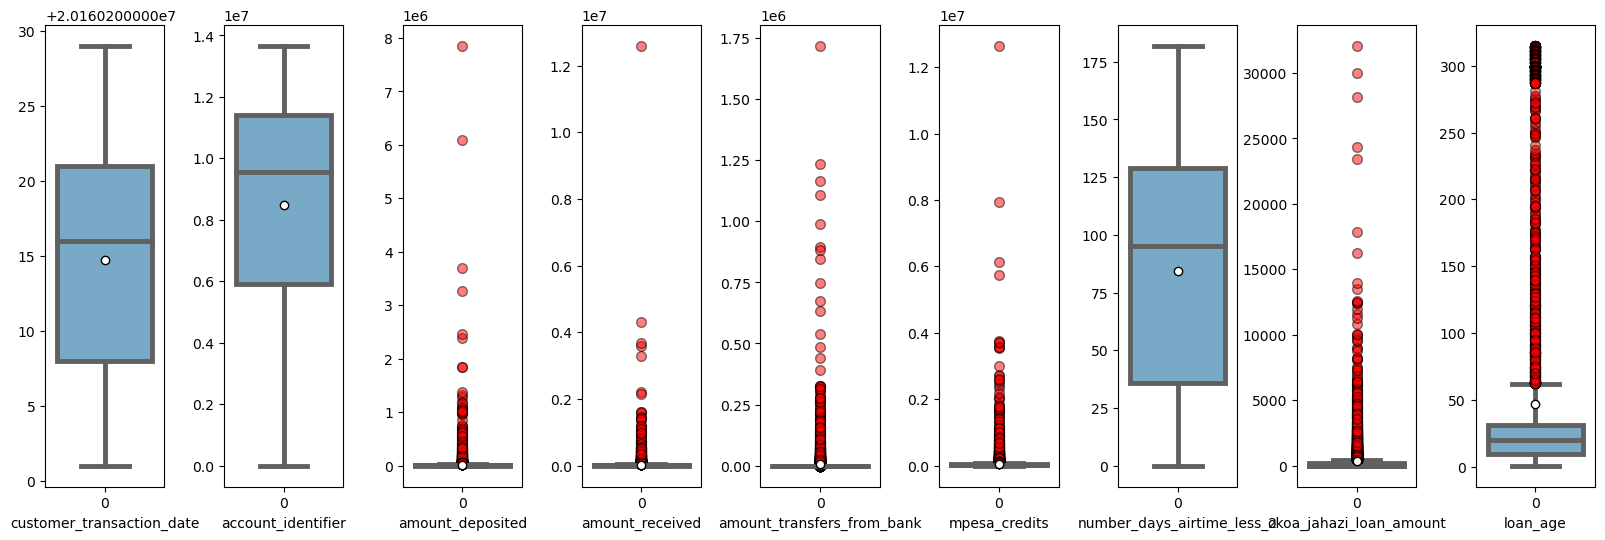

In [13]:
# Checking for outliers
cols = list(df.columns) 

flierprops = dict(marker='o', markersize=7, markeredgecolor='black', markerfacecolor='red', alpha=0.5)

# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 9, figsize=(20, 6))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5)

# drawing boxplot for each variable
i = 0
for col in cols:
    sns.boxplot(data=df[col], ax=ax[i], palette="Blues", showmeans=True, linewidth=3.5, flierprops=flierprops,
                meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"}) 
    ax[i].set_xlabel(col)
    i+= 1

**Insights:**

- **`amount_deposited`, `amount_received`, `amount_transfers_from_bank`, `mpesa_credits`, `okoa_jahazi_loan_amount` and `loan_age` columns all contain outliers.**

In [14]:
# calculating percentage of outliers
round((outliers.shape[0] / df.shape[0]) * 100, 2)

57.93

**Insights:**

- **Outliers present in the dataset account for more than half of our records. Will not drop the outliers to try and see how this will impact our model.**

**The dates are stored in a numeric YYYYMMDD format. We will also feature engineer a new column `transaction_day_of_week` to see if this can help with our analysis**

In [15]:
df['customer_transaction_date'] = pd.to_datetime(df['customer_transaction_date'], format='%Y%m%d')

# Create a new column for day of the week
df['transaction_day_of_week'] = df['customer_transaction_date'].dt.day_name()

df.head()

,customer_transaction_date,account_identifier,amount_deposited,amount_received,amount_transfers_from_bank,mpesa_credits,number_days_airtime_less_2,okoa_jahazi_loan_amount,loan_age,transaction_day_of_week
0,2016-02-01,3008009.0,27590.0,53226.0,0.0,80816.0,139.0,800.0,5.0,Monday
1,2016-02-01,12083048.0,2140.0,0.0,2170.0,4310.0,154.0,0.0,8.0,Monday
2,2016-02-01,12930260.0,25700.0,37974.0,38972.0,102646.0,1.0,0.0,27.0,Monday
3,2016-02-01,6422098.0,9250.0,2180.0,0.0,11430.0,64.0,0.0,5.0,Monday
4,2016-02-01,5395787.0,102401.0,7169.0,0.0,109570.0,53.0,450.0,31.0,Monday


**For risk modelling purposes, assume that a loan is in default if it exceeds 90 days in age.**

In [16]:
df['default'] = df['loan_age'].apply(lambda x: 'Yes' if x > 90 else 'No')

**Checking for normality**

In [17]:
def test_normality(data, column, alpha=0.05):
    """
    # Performs a Shapiro-Wilk test for normality on a specified column

    # data: DataFrame containing the column to test
    # column: String name of the column to test
    # alpha: Significance level for the test (default 0.05)
    """

    from scipy.stats import shapiro
    
    n = 200 
    sample = data.sample(n)
    
    col = sample[column]
    
    stat, p = shapiro(col)
    
    if p > alpha:
        print('Sample looks Gaussian for column {} (fail to reject H0)'.format(column))
    else:
        print('Sample does not look Gaussian for column {} (reject H0)'.format(column))

In [18]:
display(test_normality(df, 'number_days_airtime_less_2'))
print(test_normality(df, 'amount_deposited'))

Sample does not look Gaussian for column number_days_airtime_less_2 (reject H0)


None

Sample does not look Gaussian for column amount_deposited (reject H0)
None


**Checking for Normality using Visual Inspection.**

In [19]:
test_normality(df, ['amount_received', 'amount_transfers_from_bank', 'mpesa_credits'])

Sample does not look Gaussian for column ['amount_received', 'amount_transfers_from_bank', 'mpesa_credits'] (reject H0)


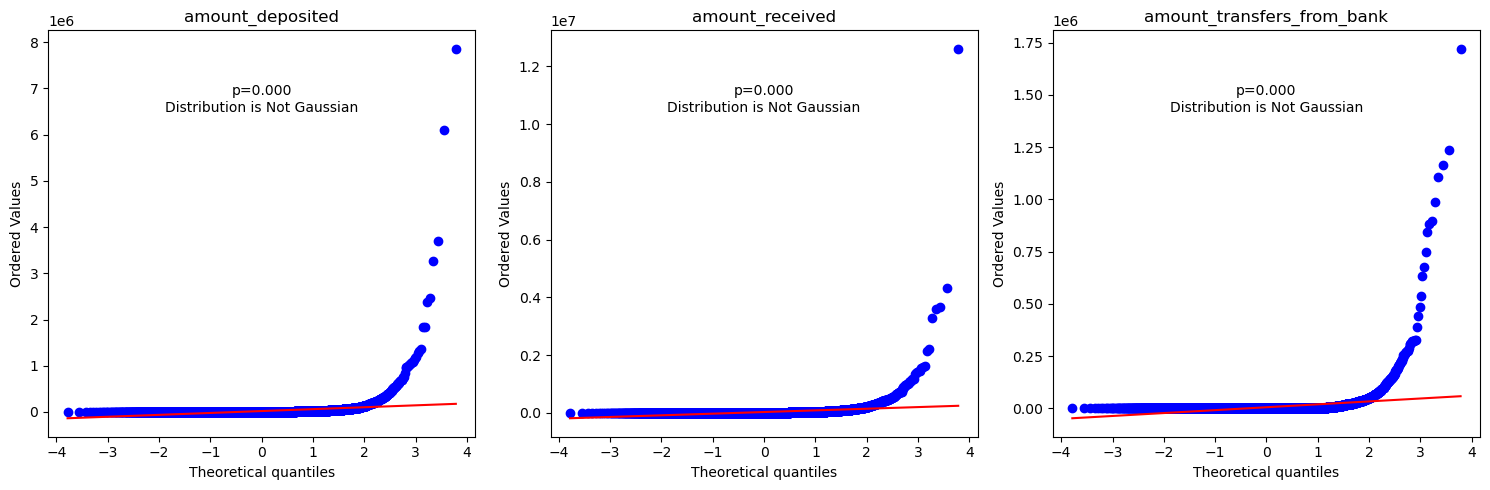

(<Figure size 1500x500 with 3 Axes>,
 array([<AxesSubplot:title={'center':'amount_deposited'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>,
        <AxesSubplot:title={'center':'amount_received'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>,
        <AxesSubplot:title={'center':'amount_transfers_from_bank'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>],
       dtype=object))

In [20]:
from scipy.stats import probplot
from scipy.stats import shapiro

def test_normality(df, columns):

    fig, axs = plt.subplots(1, len(columns), figsize=(15, 5))

    for i, col in enumerate(columns):

        # Test normality
        stat, p = shapiro(df[col])
        
        # Add test result
        if p > 0.05:
            gaussian = True 
        else:
            gaussian = False
        
        axs[i].text(0.5, 0.8, f"p={p:.3f}\nDistribution is {'Gaussian' if gaussian else 'Not Gaussian'}",
                    horizontalalignment='center',
                    transform=axs[i].transAxes)
        
        # Plot
        probplot(df[col], plot=axs[i])
        axs[i].set_title(col)

    fig.tight_layout()
    plt.show()

    return fig, axs

# Example
test_normality(df, ['amount_deposited', 'amount_received', 'amount_transfers_from_bank'])

**Insights:**

**The three graphs that plot the theoretical quantiles and observed values of three variables: `amount_deposited`, `amount_received`, and `amount_transfers_from_bank`. The graphs can tell us:**

- The distribution of the variables: The graphs show that the variables are positively skewed, meaning that most of the values are clustered near the lower end and there are some outliers at the higher end.

- The relationship between the variables and the normal distribution: The graphs show that the variables are not normally distributed, meaning that they do not follow a bell-shaped curve. The p-values of 0.000 indicate that the difference between the observed values and the normal distribution is statistically significant.

- The goodness of fit of the normal distribution: The graphs show that the normal distribution is not a good fit for the variables, meaning that it does not capture the variability and shape of the data well. The red line (theoretical quantiles) and the blue dots (observed values) do not align closely.


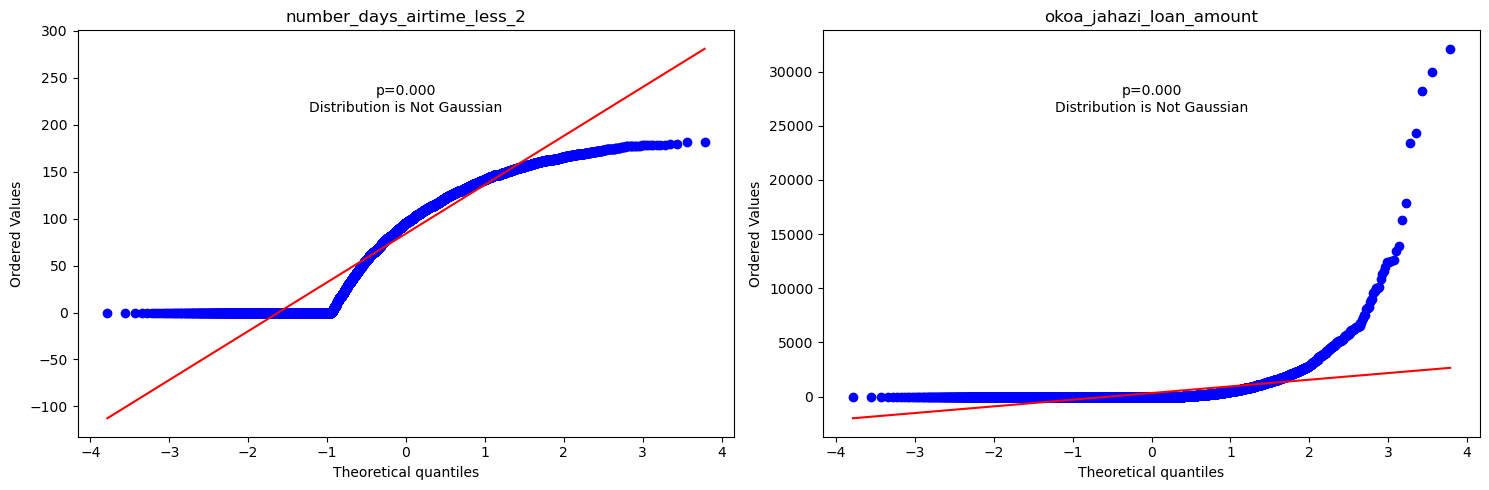

(<Figure size 1500x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'number_days_airtime_less_2'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>,
        <AxesSubplot:title={'center':'okoa_jahazi_loan_amount'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>],
       dtype=object))

In [21]:
test_normality(df, ['number_days_airtime_less_2', 'okoa_jahazi_loan_amount'])

**Insights:**

 **The two graphs are used to test the normality of the data. The graphs plot the observed values of two variables (`number_days_airtime<2` and `okoa_jahazi_loan_amount`) against the theoretical quantiles of a normal distribution. The red line represents the ideal fit for a normal distribution. The p-value of 0.0000 indicates that the null hypothesis of normality is rejected for both variables. This means that the data is not normally distributed and may need some transformation or a different statistical test.**

In [22]:
import pandas_dq
from pandas_dq import dq_report, Fix_DQ


dq_report(df, verbose=1)

fdq = Fix_DQ() # fixing issues

df_transformed = fdq.fit_transform(df)

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
customer_transaction_date,datetime64[ns],0.000000,0,nan,nan,No issue
account_identifier,float64,0.000000,NA,515.000000,13669753.000000,No issue
amount_deposited,float64,0.000000,NA,0.000000,7858300.000000,has 1074 outliers greater than upper bound (24867.50) or lower than lower bound(-14512.50). Cap them or remove them.
amount_received,float64,0.000000,NA,0.000000,12605460.000000,has 1053 outliers greater than upper bound (46669.50) or lower than lower bound(-27638.50). Cap them or remove them.
amount_transfers_from_bank,float64,0.000000,NA,0.000000,1720000.000000,has 2079 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
mpesa_credits,float64,0.000000,NA,0.000000,12647660.000000,"has 1040 outliers greater than upper bound (84806.25) or lower than lower bound(-42883.75). Cap them or remove them., has a high correlation with ['amount_received']. Consider dropping one of them."
number_days_airtime_less_2,float64,0.000000,NA,0.000000,182.000000,No issue
okoa_jahazi_loan_amount,float64,0.000000,NA,0.000000,32100.000000,has 1521 outliers greater than upper bound (425.00) or lower than lower bound(-255.00). Cap them or remove them.
loan_age,float64,0.000000,NA,1.000000,315.000000,has 1334 outliers greater than upper bound (62.50) or lower than lower bound(-21.50). Cap them or remove them.
transaction_day_of_week,object,0.000000,0,nan,nan,No issue


In [23]:
# save to csv file
# df.to_csv('project_data.csv', index=False)

# <font color='goldenrod'>3. Explore</font>

In [24]:
# Describe the summary statistics of the dataframe
df.describe()

,account_identifier,amount_deposited,amount_received,amount_transfers_from_bank,mpesa_credits,number_days_airtime_less_2,okoa_jahazi_loan_amount,loan_age
count,8.987000e+03,8.987000e+03,8.987000e+03,8.987000e+03,8.987000e+03,8987.000000,8987.000000,8987.000000
mean,8.495944e+06,1.971403e+04,2.936527e+04,5.830887e+03,5.491019e+04,84.155224,327.008410,46.687882
std,3.739568e+06,1.416490e+05,1.791499e+05,4.295223e+04,2.506998e+05,54.301817,1155.162628,79.754988
min,5.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
25%,5.912660e+06,2.550000e+02,2.270000e+02,0.000000e+00,5.000000e+03,36.000000,0.000000,10.000000
50%,9.566251e+06,2.880000e+03,4.057000e+03,0.000000e+00,1.378000e+04,95.000000,0.000000,20.000000
75%,1.139548e+07,1.010000e+04,1.880400e+04,0.000000e+00,3.692250e+04,129.000000,170.000000,31.000000
max,1.366975e+07,7.858300e+06,1.260546e+07,1.720000e+06,1.264766e+07,182.000000,32100.000000,315.000000


**Insights:**

***Here are a few key observations about the summary statistics:***

- There are 8,987 observations for each variable. This is a decently large sample size.
- The mean amount deposited is 19,714, while the median is 2,880. This indicates a right-skewed distribution, with some very large values pulling up the mean.
- Similarly, the mean amount received is 29,365 while the median is 4,057. Another right-skewed distribution.
- The standard deviation for amount deposited and received is very large relative to the mean. This indicates high variability in the data.
- 75% of observations have 0 amount transfers from bank. 25% have more than 0, indicating most have no transfers.
- The max loan amount is quite high at 32,100 compared to the median of 0. This variable is also highly right-skewed.
- Loan age has a mean of 46.7 and median of 20. So most loans are relatively new, but some are much older.

***In summary, most of the amount variables are highly skewed right, with a few very high values. Many observations have zeros for certain variables like transfers and loans. Overall the data covers a diverse set of mobile money accounts.***

### 3.1 Univariate Analysis

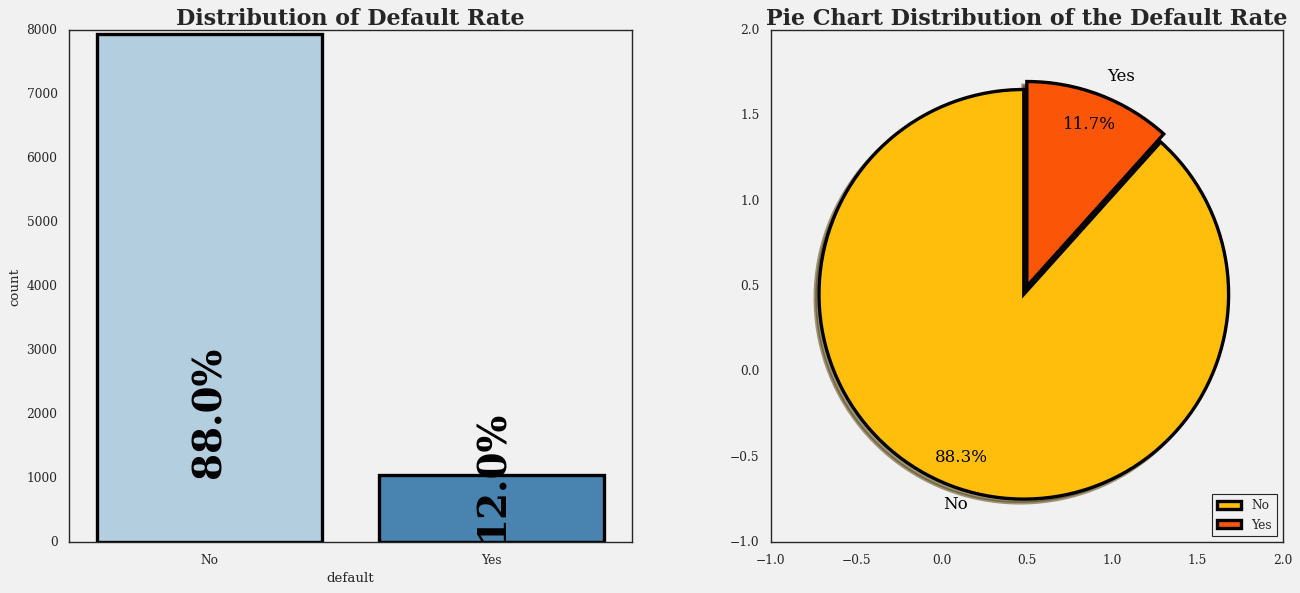

In [25]:
# Distribution of Default Rate

plt.style.background = 'white'
plt.style.use('classic')

colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='default', data=df, palette='Blues', edgecolor='black', linewidth=3.0)

for i in ax.patches:
  ax.text(x = i.get_x()+i.get_width()/2, y = i.get_height()/7, s = f"{np.round(i.get_height()/len(df)*100.0)}%", ha = 'center', size = 35, weight = 'bold', rotation = 90, color = 'black')
plt.title("Distribution of Default Rate", size = 20, weight = 'bold')


plt.subplot(1, 2, 2)
sizes = df['default'].value_counts()
colors = ['#ffbe0b','#fb5607']
labels = ['No', 'Yes']
explode = [0.05, 0.0]


plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%1.1f%%', startangle=90, 
        textprops={'fontsize': 15}, pctdistance=0.85, 
        labeldistance=1.1, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'black' }, 
        radius = 1.2, frame = True, center = (0.5, 0.5))


plt.title('Pie Chart Distribution of the Default Rate', fontsize = 20, weight = 'bold')

# change marker text color within the pie chat
for text in plt.gca().texts:
    text.set_color('black')


# Adding a legend and specifying its location
plt.legend(loc='lower right')


plt.show()

**Insights:**

**There are significantly more accounts that have been repaid on time than accounts that have defaulted. This is a good thing for lenders, as it means that they are more likely to get their money back. It is also a good thing for borrowers, as it means that they are more likely to be able to qualify for loans in the future.**

**This also raises the issue of class imbalance between the negative and positive class.**

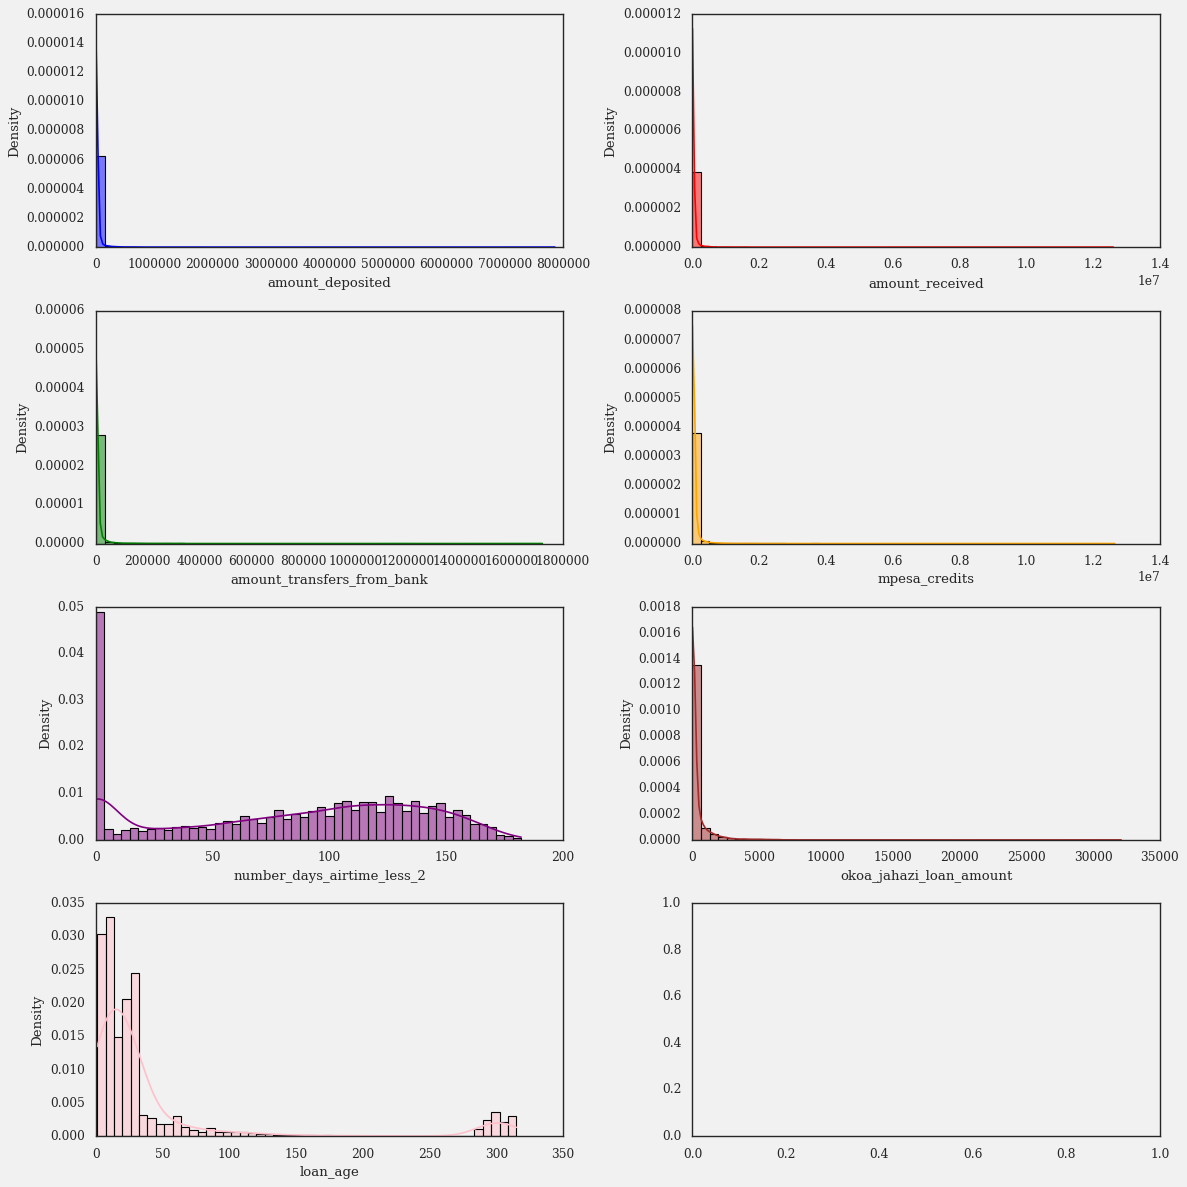

In [26]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

hist_data = [
    ('amount_deposited', 'blue'),
    ('amount_received', 'red'),
    ('amount_transfers_from_bank', 'green'),  
    ('mpesa_credits', 'orange'),
    ('number_days_airtime_less_2', 'purple'),
    ('okoa_jahazi_loan_amount', 'brown'),
    ('loan_age', 'pink')
]

for i, (col, color) in enumerate(hist_data):
    ax = axs[i//2, i%2]
    sns.histplot(data=df, x=col, color=color, alpha=0.5, edgecolor='black', 
                linewidth=1.0, kde=True, stat='density', ax=ax, bins=50)

plt.tight_layout()
plt.show()

**Insights:**

- **The distribution of loan age is skewed right, with most customers having loans less than 90 days old. This means that most customers have recently taken out loans. This could be because the company is new and is still growing its customer base, or it could be because the company offers short-term loans.**

- **The variable number_days_airtime<2 displays characteristics of a mixture distribution. This means that the distribution of this variable is likely made up of two or more different distributions. For example, imagine a distribution of the number of days that customers have gone without purchasing airtime. This distribution might be a mixture of two distributions: one distribution for customers who regularly purchase airtime and another distribution for customers who rarely purchase airtime.**

- **The values for the variables `amount_deposited`, `amount_received`, `amount_transfers_from_bank`, `mpesa_credits`, and `okoa_jahazi_loan_amount` are centered around zero and skew to the right side of the distribution. This means that the majority of values for these variables are close to zero, but there are more large positive values than large negative values. For example, imagine a distribution of customer account balances, where most customers have balances close to zero, but there are a few customers with very large balances. This distribution would be skewed to the right.**

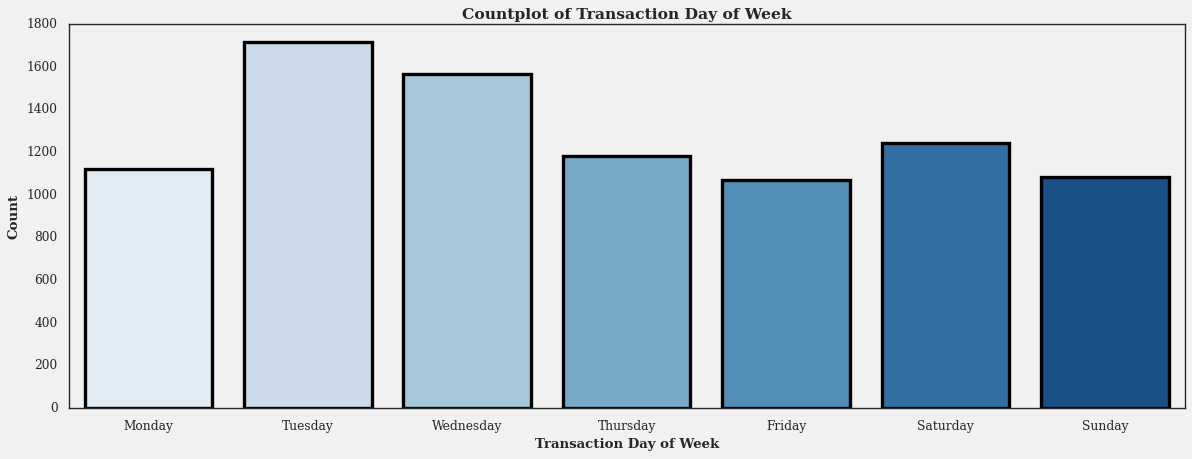

In [27]:
# Countploat of the transaction_day_of_week
plt.figure(figsize=(18, 6))
sns.countplot(df['transaction_day_of_week'], palette='Blues', edgecolor='black', linewidth=3.0)
plt.title('Countplot of Transaction Day of Week', fontsize=14, fontweight='bold', fontfamily='serif')
plt.xlabel('Transaction Day of Week', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Count', fontsize=12, fontweight='bold', fontfamily='serif')
plt.show()

**Insights:**

**Mobile money transactions are more common on weekdays than on weekends, with Tuesdays having the highest number of transactions. This means that people are more likely to send and receive money using their mobile phones during the workweek, when they are more likely to be making purchases or paying bills. On the other hand, mobile money transactions are less common on weekends, when people are more likely to be relaxing or spending time with their families.**

**Here are some possible explanations for why mobile money transactions are more common on weekdays than on weekends:**

- People are more likely to be working or running errands on weekdays. This means that they are more likely to need to send or receive money to pay for goods and services.
- Businesses are more likely to be open on weekdays. This means that people have more opportunities to use mobile money to make payments.
- People may be more likely to use mobile money to pay for bills on weekdays. This is because many bills are due on or around the first of the month, which typically falls on a weekday.

### 3.2 Bivariate Analysis

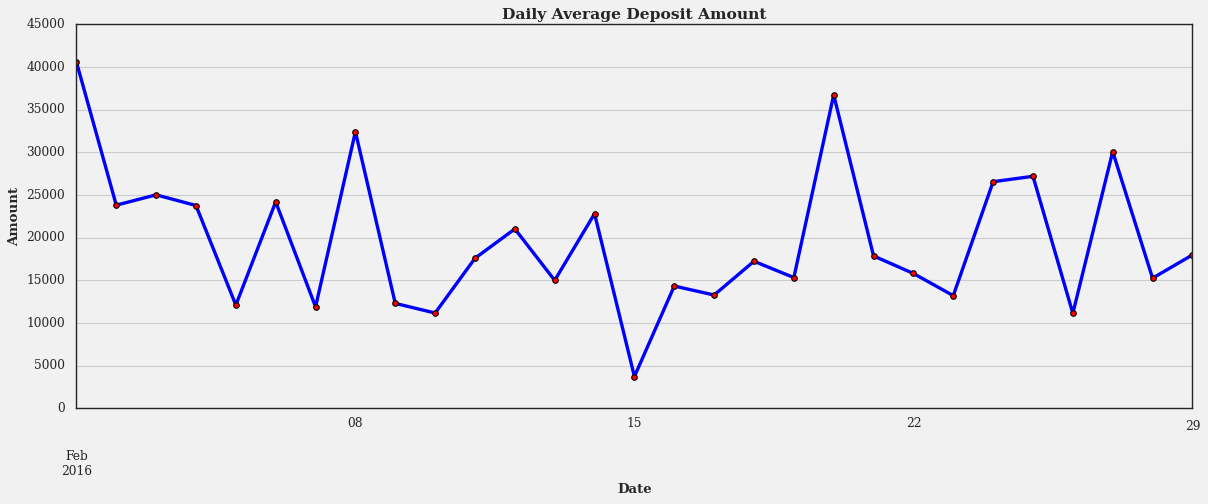

In [28]:
# Set transaction date as index
df2 = df.set_index('customer_transaction_date')

# Resample to daily mean 
daily_agg = df2.resample('D').mean() 

# Plot daily average deposit amount
plt.figure(figsize=(18, 6))
daily_agg['amount_deposited'].plot(title='Daily Average Deposit Amount', color='blue', linewidth=3.0, marker='o', markersize=5.0, markerfacecolor='red', markeredgecolor='black', markeredgewidth=1.0)
plt.xlabel('Date', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Amount', fontsize=12, fontweight='bold', fontfamily='serif')
plt.title('Daily Average Deposit Amount', fontsize=14, fontweight='bold', fontfamily='serif')

# Add gridlines and show plot
plt.grid()


# Show plot
plt.show()

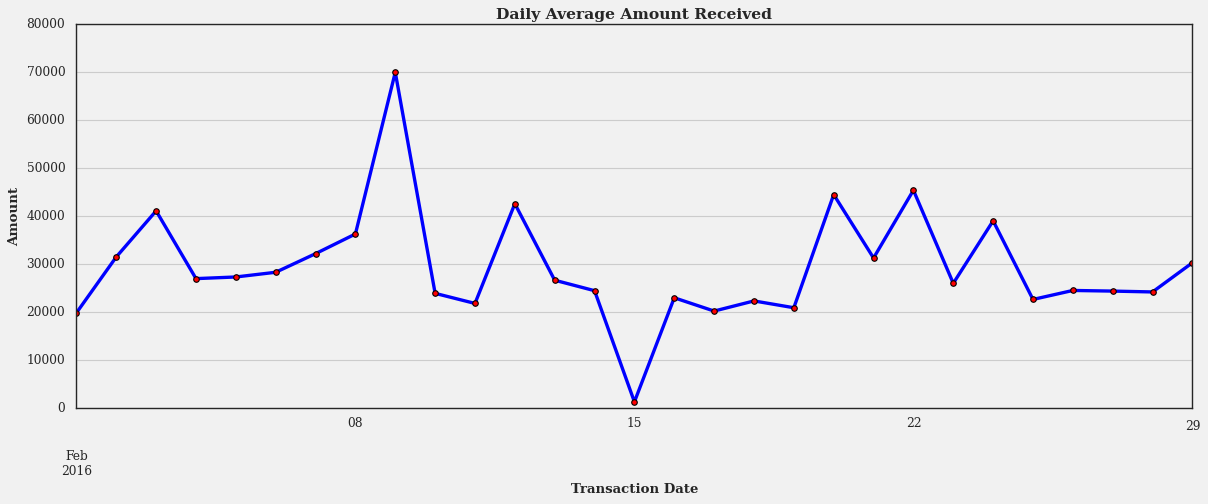

In [29]:
# Amount recieved
plt.figure(figsize=(18, 6))
daily_agg['amount_received'].plot(title='Daily Average Amount Received', color='blue', linewidth=3.0, marker='o', markersize=5.0, markerfacecolor='red', markeredgecolor='black', markeredgewidth=1.0)
plt.xlabel('Transaction Date', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Amount', fontsize=12, fontweight='bold', fontfamily='serif')
plt.title('Daily Average Amount Received', fontsize=14, fontweight='bold', fontfamily='serif')


# Add gridlines and show plot
plt.grid()

# Show plot
plt.show()


**Insights:**

**The line graph shows the daily average amount received for the month of February 2016. The graph has a peak around February 8th and a trough around February 22nd.**

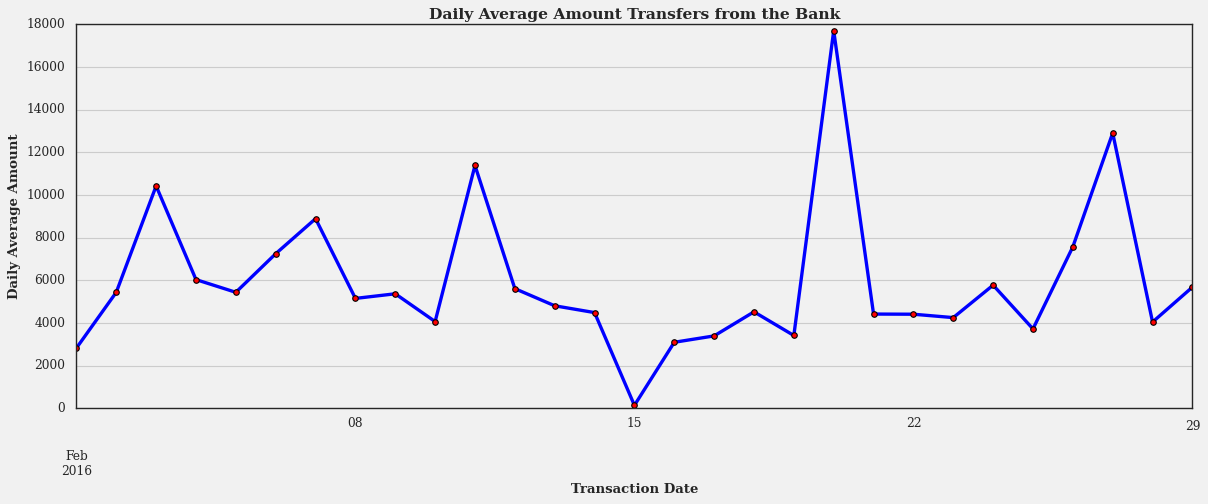

In [30]:
# Amount transfers from bank
plt.figure(figsize=(18, 6))
daily_agg['amount_transfers_from_bank'].plot(title='Daily Average Amount Transfers from the Bank', color='blue', linewidth=3.0, marker='o', markersize=5.0, markerfacecolor='red', markeredgecolor='black', markeredgewidth=1.0)
plt.xlabel('Transaction Date', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Daily Average Amount', fontsize=12, fontweight='bold', fontfamily='serif')
plt.title('Daily Average Amount Transfers from the Bank', fontsize=14, fontweight='bold', fontfamily='serif')


# Add gridlines and show plot
plt.grid()

# Show plot
plt.show()


**Insights:**

**The line graph shows the daily average amount of transfers from the bank from February 2016 to March 2016.**

**The graph shows that there were a few fluctuations in the daily average amount of transfers during this period, but the overall trend was upward.**

**There are a few possible explanations for this upward trend. One possibility is that the bank was running a promotion or offering a special incentive for customers to make transfers. Another possibility is that the bank's customers were simply becoming more comfortable with making transfers online or through mobile banking. It is also possible that there was an increase in the overall number of transactions taking place during this period.**

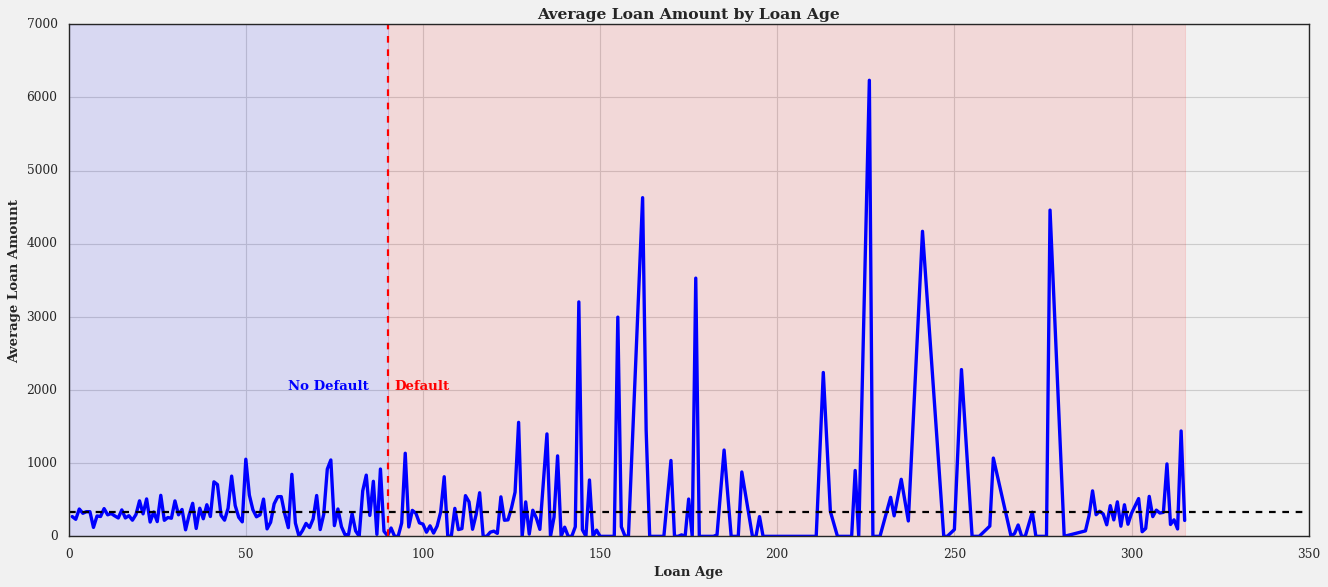

In [31]:
# Average loan amount by loan age 
plt.figure(figsize=(20, 8))
df.groupby('loan_age')['okoa_jahazi_loan_amount'].mean().plot(title='Average Loan Amount by Loan Age', color='blue', linewidth=3.0)
plt.xlabel('Loan Age', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Average Loan Amount', fontsize=12, fontweight='bold', fontfamily='serif')
plt.title('Average Loan Amount by Loan Age', fontsize=14, fontweight='bold', fontfamily='serif')

# Add a vertical line at 90 days
plt.axvline(x=90, color='red', linestyle='--', linewidth=2.0)


# Add a horizontal line at 0
# plt.axhline(y=0, color='black', linestyle='--', linewidth=2.0)


# Add line for the average loan amount
plt.axhline(y=df['okoa_jahazi_loan_amount'].mean(), color='black', linestyle='--', linewidth=2.0)



# Add text to the plot
plt.text(92, 2000, 'Default', fontsize=12, fontweight='bold', fontfamily='serif', color='red')
plt.text(62, 2000, 'No Default', fontsize=12, fontweight='bold', fontfamily='serif', color='blue')



# Add shading to the 'No Default' side of the plot to show a difference
plt.axvspan(xmin=0, xmax=90, color='blue', alpha=0.1)


# Add shading to the 'Default' side of the plot to show a difference
plt.axvspan(xmin=90, xmax=315, color='red', alpha=0.1)

# Add gridlines and show plot
plt.grid()

# Show plot
plt.show()

**Insights:**

**The line graph shows the average loan amount by loan age, for both loans that have defaulted and loans that have not defaulted.**

**The graph shows that the average loan amount for both types of loans increases with loan age. This is likely because borrowers are able to qualify for larger loans as they build up their credit history and become more established financially.**

**However, the average loan amount for defaulted loans is consistently higher than the average loan amount for non-defaulted loans. This suggests that borrowers who take out larger loans are more likely to default. This may be because they are more likely to be overextended financially and less likely to be able to withstand unexpected financial shocks.**

**The graph also shows that the gap between the average loan amount for defaulted loans and the average loan amount for non-defaulted loans widens with loan age. This suggests that the risk of default increases for larger loans over time.**

**Overall, the graph suggests that lenders should be careful when making large loans, especially to borrowers with limited credit history. Lenders should also carefully consider the borrower's financial situation and ability to repay the loan before making a decision.**

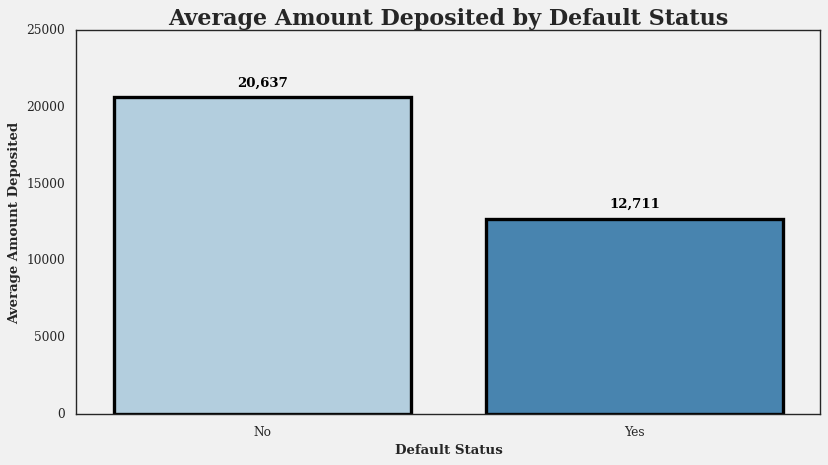

In [32]:
avg_amt_dep_by_default = df.groupby(['default']).agg({'amount_deposited': 'mean'}).reset_index().sort_values(by='amount_deposited', ascending=False)

# Plotting avg_amt_dep_by_default
plt.figure(figsize=(12, 6))
sns.barplot(x='default', y='amount_deposited', data=avg_amt_dep_by_default, palette='Blues', edgecolor='black', linewidth=3.0)
plt.title('Average Amount Deposited by Default', fontsize=14, fontweight='bold', fontfamily='serif')
plt.xlabel('Default Status', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Average Amount Deposited', fontsize=12, fontweight='bold', fontfamily='serif')

# Add annotations to the plot with each bar having a different label
for i in range(avg_amt_dep_by_default.shape[0]):
    count = avg_amt_dep_by_default.iloc[i]['amount_deposited']
    plt.annotate(f"{count:,.0f}", xy=(i, count+0.5), ha='center', color='black', 
                 fontweight='bold', fontfamily='serif', fontsize=12, 
                 rotation=0, xytext=(0, 10), textcoords='offset points')

plt.title("Average Amount Deposited by Default Status", size = 20, weight = 'bold')


# Show plot
plt.show()

**Insights:**

**The bar graph shows the average amount deposited by customers who have defaulted or not on their loans. The graph indicates that customers who have not defaulted have deposited more money on average than those who have defaulted. The difference between the two groups is about KES 8,000. This is a large difference, so this variable could be a good predictor of whether or not a customer will default on their loan.**

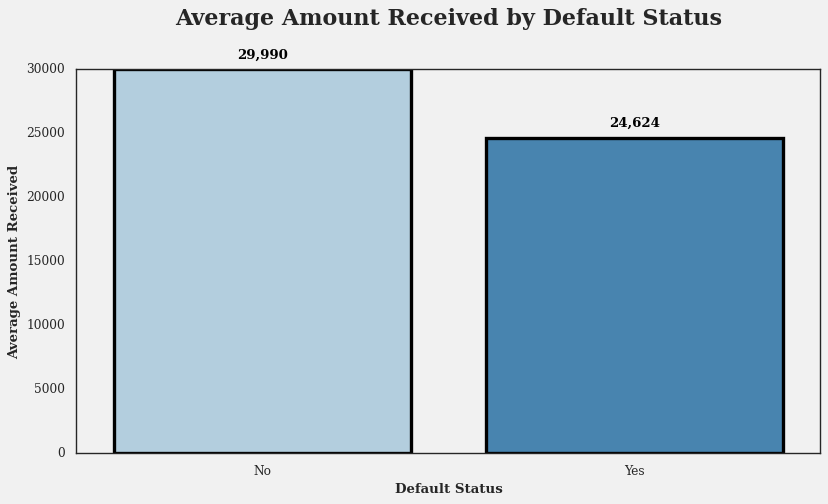

In [33]:
avg_amt_rec_by_default = df.groupby(['default']).agg({'amount_received': 'mean'}).reset_index().sort_values(by='amount_received', ascending=False)

# Plotting avg_amt_rec_by_default
plt.figure(figsize=(12, 6))

sns.barplot(x='default', y='amount_received', data=avg_amt_rec_by_default, palette='Blues', edgecolor='black', linewidth=3.0)
# plot title to the extreme right
plt.title("Average Amount Received by Default Status", size = 20, weight = 'bold', pad=40.0)
plt.xlabel('Default Status', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Average Amount Received', fontsize=12, fontweight='bold', fontfamily='serif')

# Add annotations to the plot with each bar having a different label
for i in range(avg_amt_rec_by_default.shape[0]):
    count = avg_amt_rec_by_default.iloc[i]['amount_received']
    plt.annotate(f"{count:,.0f}", xy=(i, count+0.5), ha='center', color='black', 
                 fontweight='bold', fontfamily='serif', fontsize=12, 
                 rotation=0, xytext=(0, 10), textcoords='offset points')


plt.show()


**Insights:**

**The default status category that has a higher average amount received is No. This means that customers who have not defaulted on their loans tend to receive more money than customers who have defaulted on their loans. This could be because customers who receive more money are more likely to be able to pay back their loans. It could also be because customers who receive more money are more likely to be able to qualify for larger loans.**

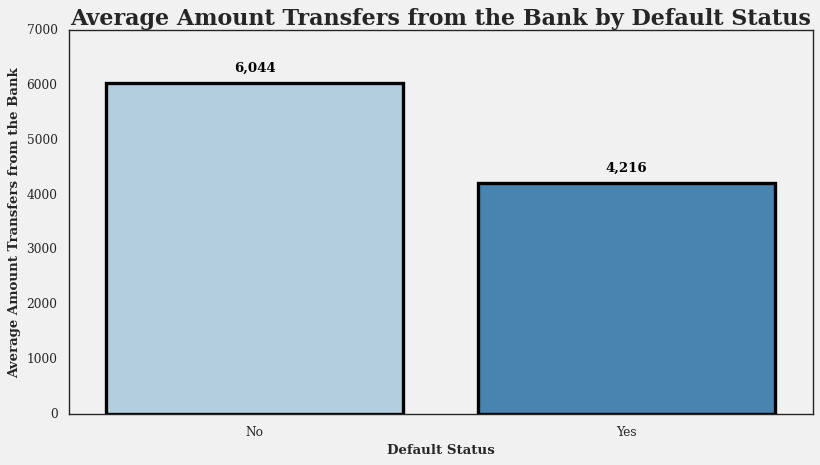

In [34]:
avg_amt_trnsfr_by_default = df.groupby(['default']).agg({'amount_transfers_from_bank': 'mean'}).reset_index().sort_values(by='amount_transfers_from_bank', ascending=False)

# Plotting avg_amt_trnsfr_by_default
plt.figure(figsize=(12, 6))

sns.barplot(x='default', y='amount_transfers_from_bank', data=avg_amt_trnsfr_by_default, palette='Blues', edgecolor='black', linewidth=3.0)
plt.title("Average Amount Transfers from the Bank by Default Status", size = 20, weight = 'bold')
plt.xlabel('Default Status', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Average Amount Transfers from the Bank', fontsize=12, fontweight='bold', fontfamily='serif')

# Add annotations to the plot with each bar having a different label
for i in range(avg_amt_trnsfr_by_default.shape[0]):
    count = avg_amt_trnsfr_by_default.iloc[i]['amount_transfers_from_bank']
    plt.annotate(f"{count:,.0f}", xy=(i, count+0.5), ha='center', color='black', 
                 fontweight='bold', fontfamily='serif', fontsize=12, 
                 rotation=0, xytext=(0, 10), textcoords='offset points')


plt.show()




**Insights:**

**The bar graph shows the average amount of money transferred from the bank by customers who have defaulted or not defaulted on their loans. The graph indicates that customers who have not defaulted on their loans transfer more money from the bank than those who have defaulted. The difference between the two groups is about KES 1,828.**

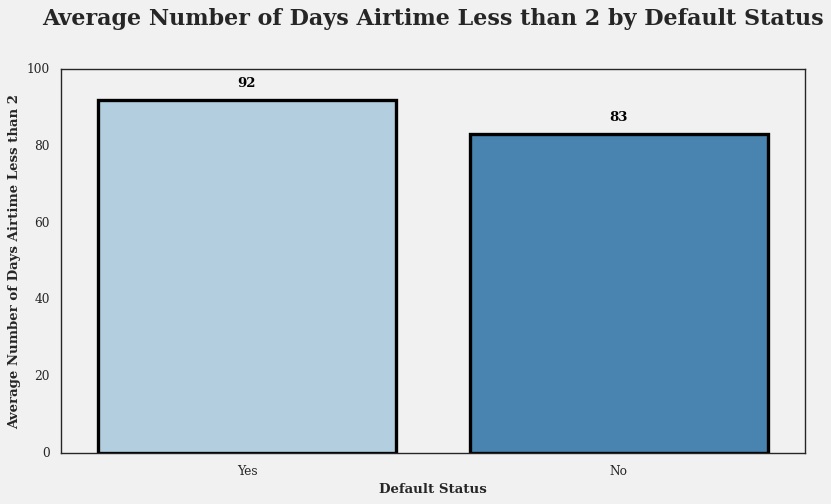

In [35]:
avg_no_days_airtime_less_2 = df.groupby(['default']).agg({'number_days_airtime_less_2': 'mean'}).reset_index().sort_values(by='number_days_airtime_less_2', ascending=False)

# Plotting avg_no_days_airtime_less_2
plt.figure(figsize=(12, 6))

sns.barplot(x='default', y='number_days_airtime_less_2', data=avg_no_days_airtime_less_2, palette='Blues', edgecolor='black', linewidth=3.0)
plt.title("Average Number of Days Airtime Less than 2 by Default Status", size = 20, weight = 'bold', pad=40.0)
plt.xlabel('Default Status', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Average Number of Days Airtime Less than 2', fontsize=12, fontweight='bold', fontfamily='serif')

# Add annotations to the plot with each bar having a different label
for i in range(avg_no_days_airtime_less_2.shape[0]):
    count = avg_no_days_airtime_less_2.iloc[i]['number_days_airtime_less_2']
    plt.annotate(f"{count:,.0f}", xy=(i, count+0.5), ha='center', color='black', fontweight='bold', 
                 fontfamily='serif', fontsize=12, 
                 rotation=0, xytext=(0, 10), textcoords='offset points')


plt.show()

**Insights:**

 **The bar graph shows the average number of days that customers have less than 2 units of airtime left on their phones, based on whether they defaulted on their loans or not. The graph suggests that customers who defaulted on their loans had more days with low airtime than those who did not. This could imply that customers who default on their loans are more likely to have financial difficulties or lower income. However, it is also possible that customers who default on their loans are more likely to use their airtime for mobile money transactions, which would cause them to run out of airtime more quickly.**

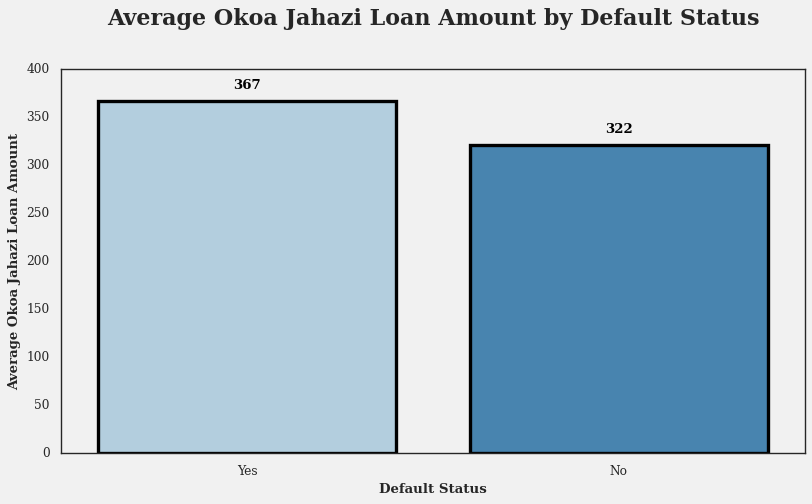

In [36]:
avg_okoa_jahazi_loan_amount = df.groupby(['default']).agg({'okoa_jahazi_loan_amount': 'mean'}).reset_index().sort_values(by='okoa_jahazi_loan_amount', ascending=False)

# Plotting avg_okoa_jahazi_loan_amount
plt.figure(figsize=(12, 6))

sns.barplot(x='default', y='okoa_jahazi_loan_amount', data=avg_okoa_jahazi_loan_amount, palette='Blues', edgecolor='black', linewidth=3.0)
plt.title("Average Okoa Jahazi Loan Amount by Default Status", size = 20, weight = 'bold', pad=40.0)
plt.xlabel('Default Status', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Average Okoa Jahazi Loan Amount', fontsize=12, fontweight='bold', fontfamily='serif')

# Add annotations to the plot with each bar having a different label
for i in range(avg_okoa_jahazi_loan_amount.shape[0]):
    count = avg_okoa_jahazi_loan_amount.iloc[i]['okoa_jahazi_loan_amount']
    plt.annotate(f"{count:,.0f}", xy=(i, count+0.5), ha='center', color='black', fontweight='bold', 
                 fontfamily='serif', fontsize=12, 
                 rotation=0, xytext=(0, 10), textcoords='offset points')


plt.show()

**Insights:**

**The bar graph that shows the average Okoa Jahazi loan amount for customers who defaulted or not on their loans. The graph indicates that customers who defaulted had a slightly higher average loan amount than those who did not. The difference is about 45 shillings.**

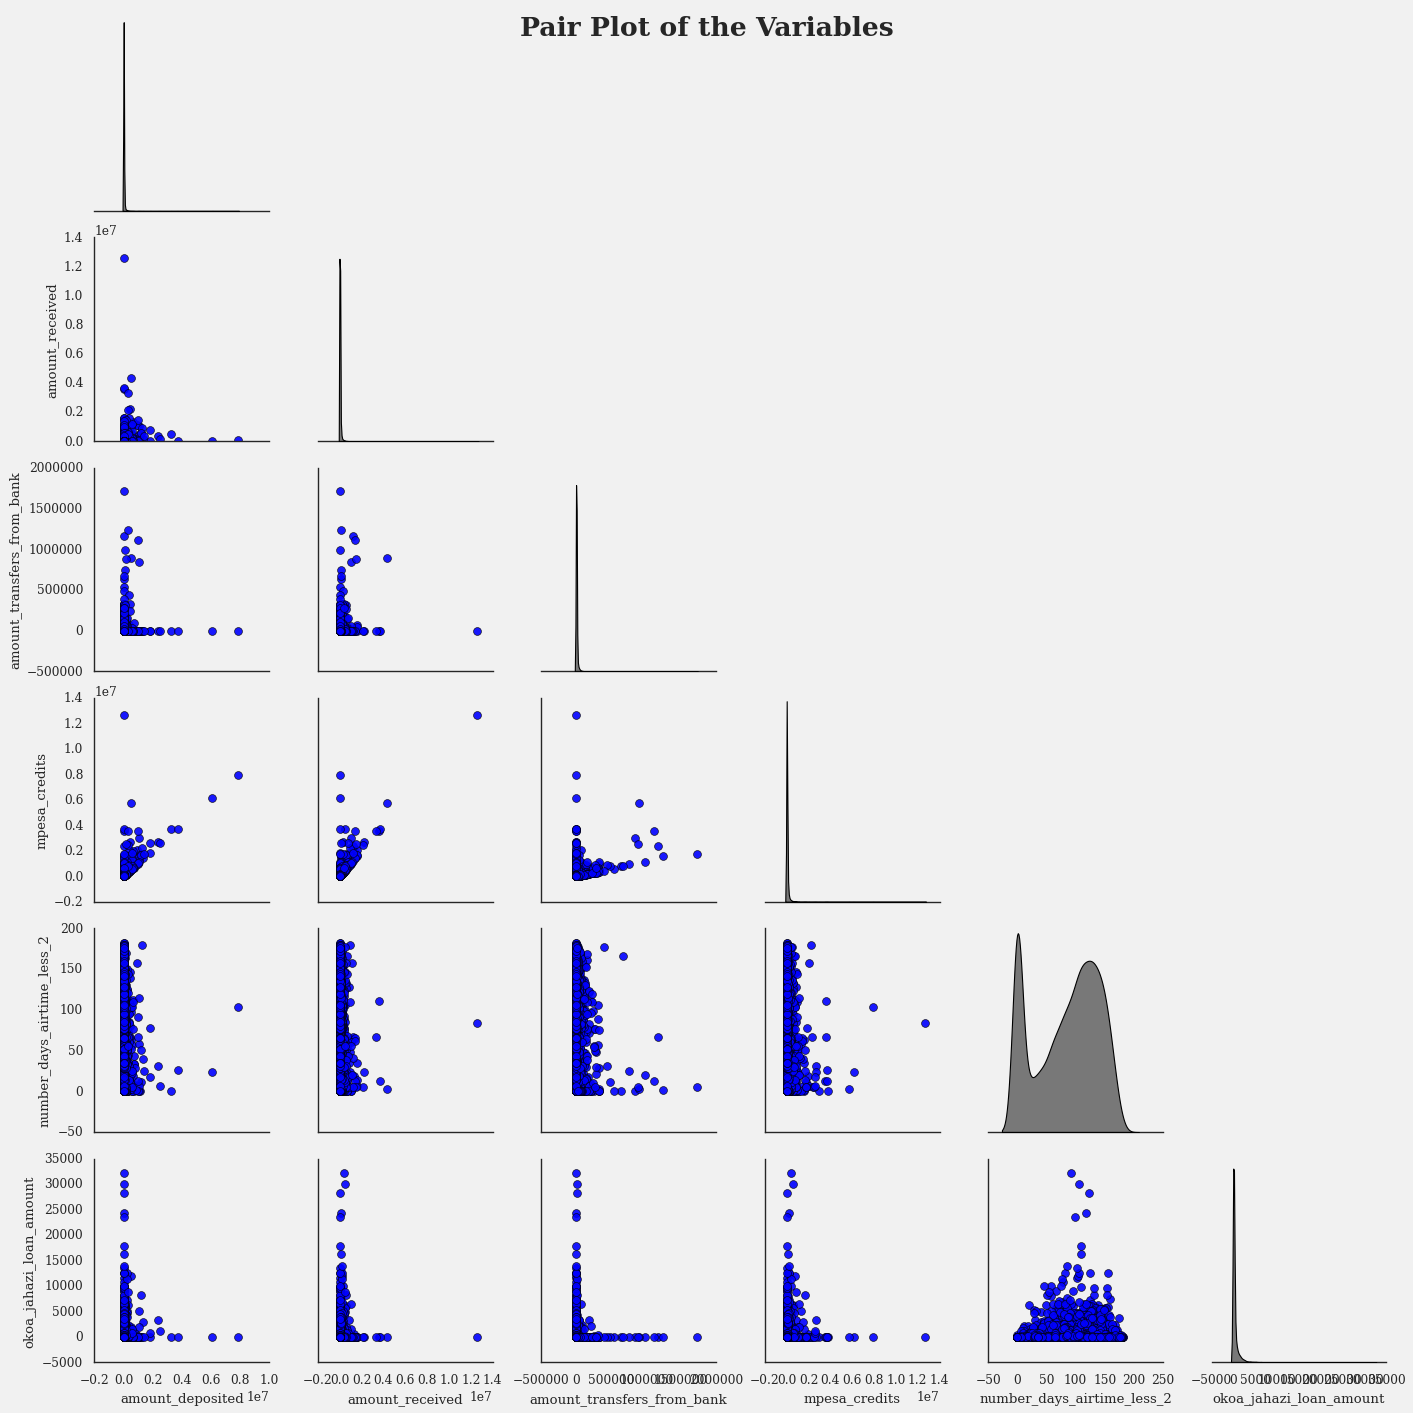

In [37]:
pair_plot_mask = ['amount_deposited','amount_received', 'amount_transfers_from_bank', 
                  'mpesa_credits','number_days_airtime_less_2', 'okoa_jahazi_loan_amount']


# Create a pair plot using the mask
sns.pairplot(data=df[pair_plot_mask], diag_kind='kde', palette='Blues', corner=True, 
             height=3.0, aspect=1.0, markers=['o', 's'], plot_kws={'s': 50, 'alpha': 0.9, 'edgecolor': 'black'}, 
             diag_kws={'color': 'black', 'alpha': 0.5, 'linewidth': 1.0})
plt.xticks(rotation=45)

# Add a title
plt.suptitle('Pair Plot of the Variables', fontsize=24, fontweight='bold', fontfamily='serif')

# Show plot
plt.show()

### 3.3 Multivariate Analysis

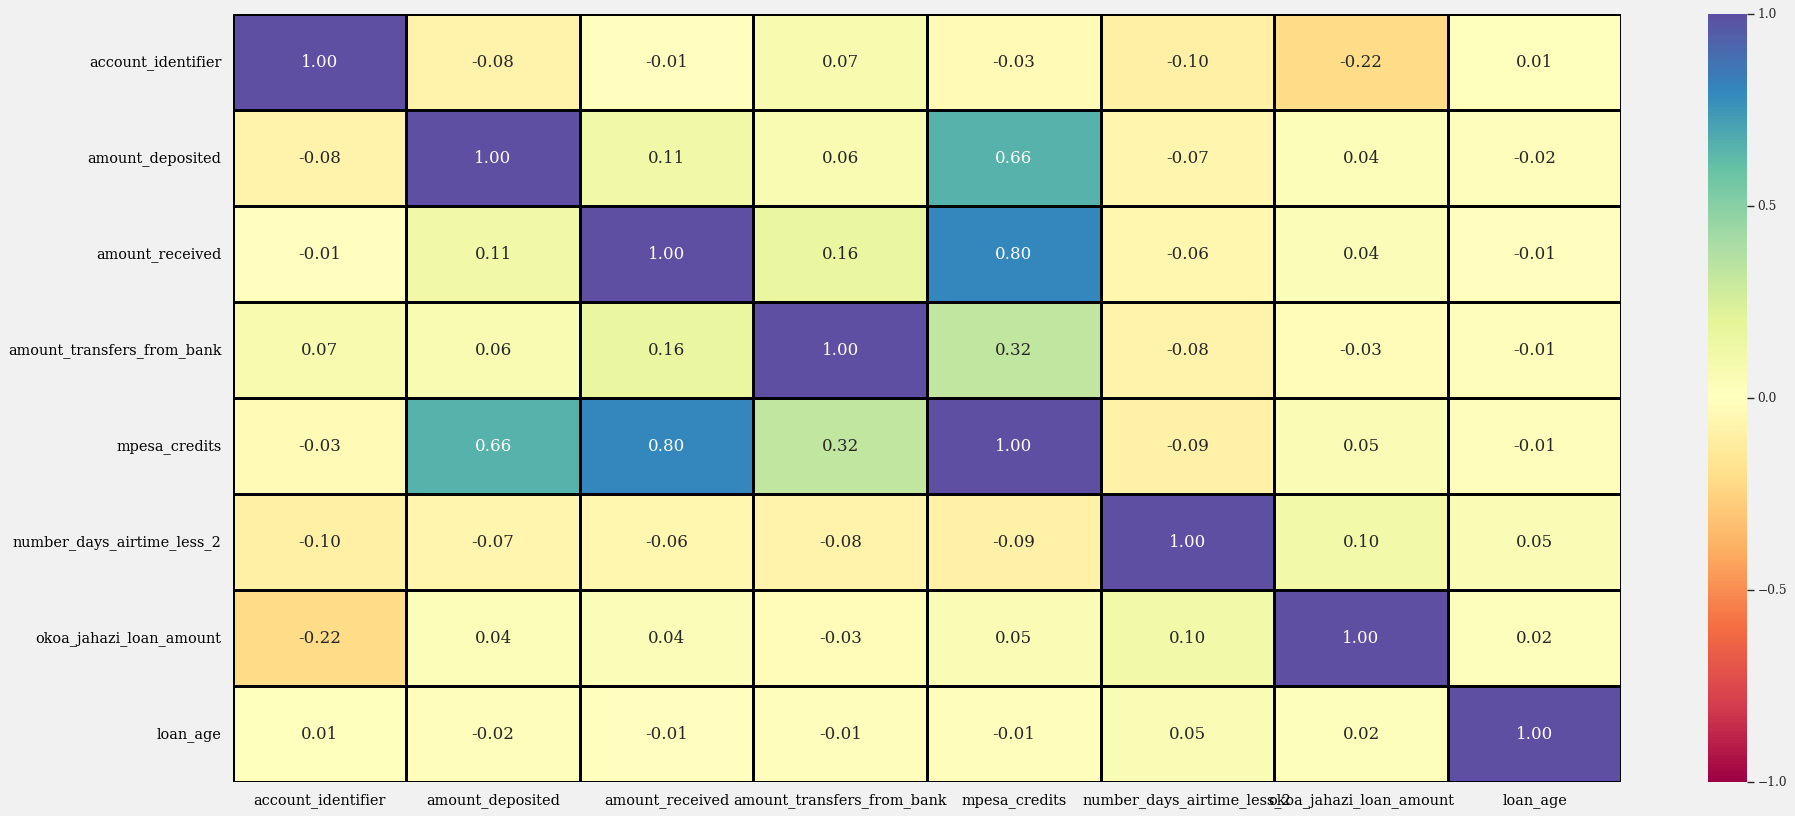

In [38]:
# checking the correlations between the numerical variables
df_corr = df.corr()

df_corr
# plotting the correlations onto a heatmap
plt.figure(figsize = (28,12))
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot=True, linewidths= 1, linecolor='black', cmap = "Spectral", annot_kws={"size": 15}, fmt='.2f')
plt.xticks(color='black', fontsize=13)
plt.yticks(color='black', fontsize=13)
plt.show()

**Insights:**

- **We can note that there are two strong positive correlations between `mpesa_credits` and `amount_received` and `amount_deposited`.**

- **We laso note a weak positive correlation between `mpesa_credits` and `amount_transfers_from_bank`.**

### Test for Multicollinearity

In [39]:
vif = pd.DataFrame(np.linalg.inv(df_corr.values), index = df_corr.index, columns=df_corr.columns)

vif

,account_identifier,amount_deposited,amount_received,amount_transfers_from_bank,mpesa_credits,number_days_airtime_less_2,okoa_jahazi_loan_amount,loan_age
account_identifier,1.066196,2.096189e-01,1.725232e-01,-2.839911e-02,-2.261280e-01,0.080166,0.216599,-0.017244
amount_deposited,0.220549,5.311639e+14,6.717869e+14,1.610649e+14,-9.400893e+14,-0.046214,0.337677,-0.066274
amount_received,0.179333,6.717869e+14,8.496391e+14,2.037060e+14,-1.188973e+15,-0.097324,0.410054,-0.096215
amount_transfers_from_bank,-0.030412,1.610649e+14,2.037060e+14,4.883971e+13,-2.850633e+14,0.031391,0.126711,-0.016836
mpesa_credits,-0.245480,-9.400893e+14,-1.188973e+15,-2.850633e+14,1.663833e+15,0.200202,-0.643820,0.135858
number_days_airtime_less_2,0.080166,-5.434160e-02,-1.076035e-01,2.892607e-02,2.145874e-01,1.032303,-0.090525,-0.052884
okoa_jahazi_loan_amount,0.216599,3.357360e-01,4.075989e-01,1.261228e-01,-6.403853e-01,-0.090525,1.059924,-0.014775
loan_age,-0.017244,-6.642392e-02,-9.640456e-02,-1.688151e-02,1.361233e-01,-0.052884,-0.014775,1.003479


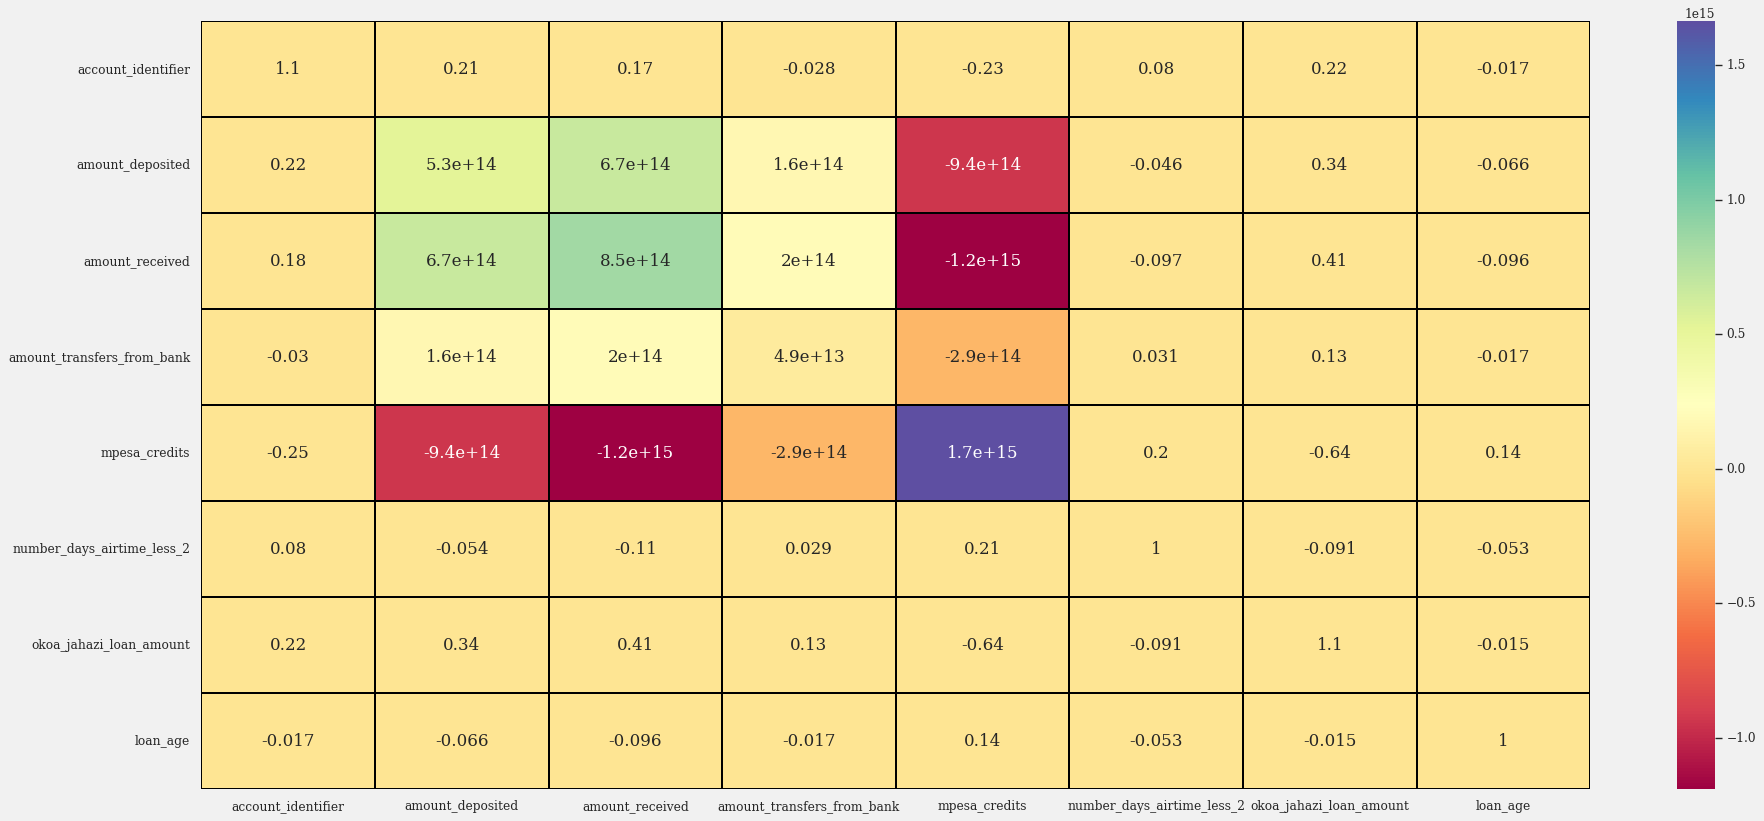

In [40]:
vif = pd.DataFrame(np.linalg.inv(df_corr.values), index = df_corr.index, columns=df_corr.columns)

# plt.style.use("ggplot")
plt.figure(figsize = (28,12))
sns.heatmap(vif, annot = True, cmap = 'Spectral', linewidths = 1.5, linecolor= 'black', annot_kws={"size": 15})

plt.show()

**Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal.**

**Insights:**

- **The VIF values for most variables are below 5, indicating low to moderate multicollinearity. However, the VIF for 'mpesa_credits' is very high at 166. This suggests severe multicollinearity with other predictors.**

- **The variables 'amount_deposited', 'amount_received', and 'mpesa_credits' have very high VIFs and are likely highly correlated with each other. This makes sense as they seem to be measuring related concepts.**

- **`loan_age` and `number_days_airtime<2` have the lowest VIFs, indicating they are less correlated with other predictors.**

- **`okoa_jahazi_loan_amount` and `account_identifier` have moderate VIFs between 1-5, so multicollinearity may be a concern but it is manageable.**

**Overall, `mpesa_credits` should be investigated further and potentially removed due to its high VIF. The other predictors have acceptable VIFs, but correlations between 'amount_deposited', 'amount_received' should be checked.**

In [41]:
# Dropping unwanted columns
df.drop(['customer_transaction_date', 'account_identifier', 'transaction_day_of_week', 'mpesa_credits', 'loan_age'], axis=1, inplace=True)

df.shape

(8987, 6)

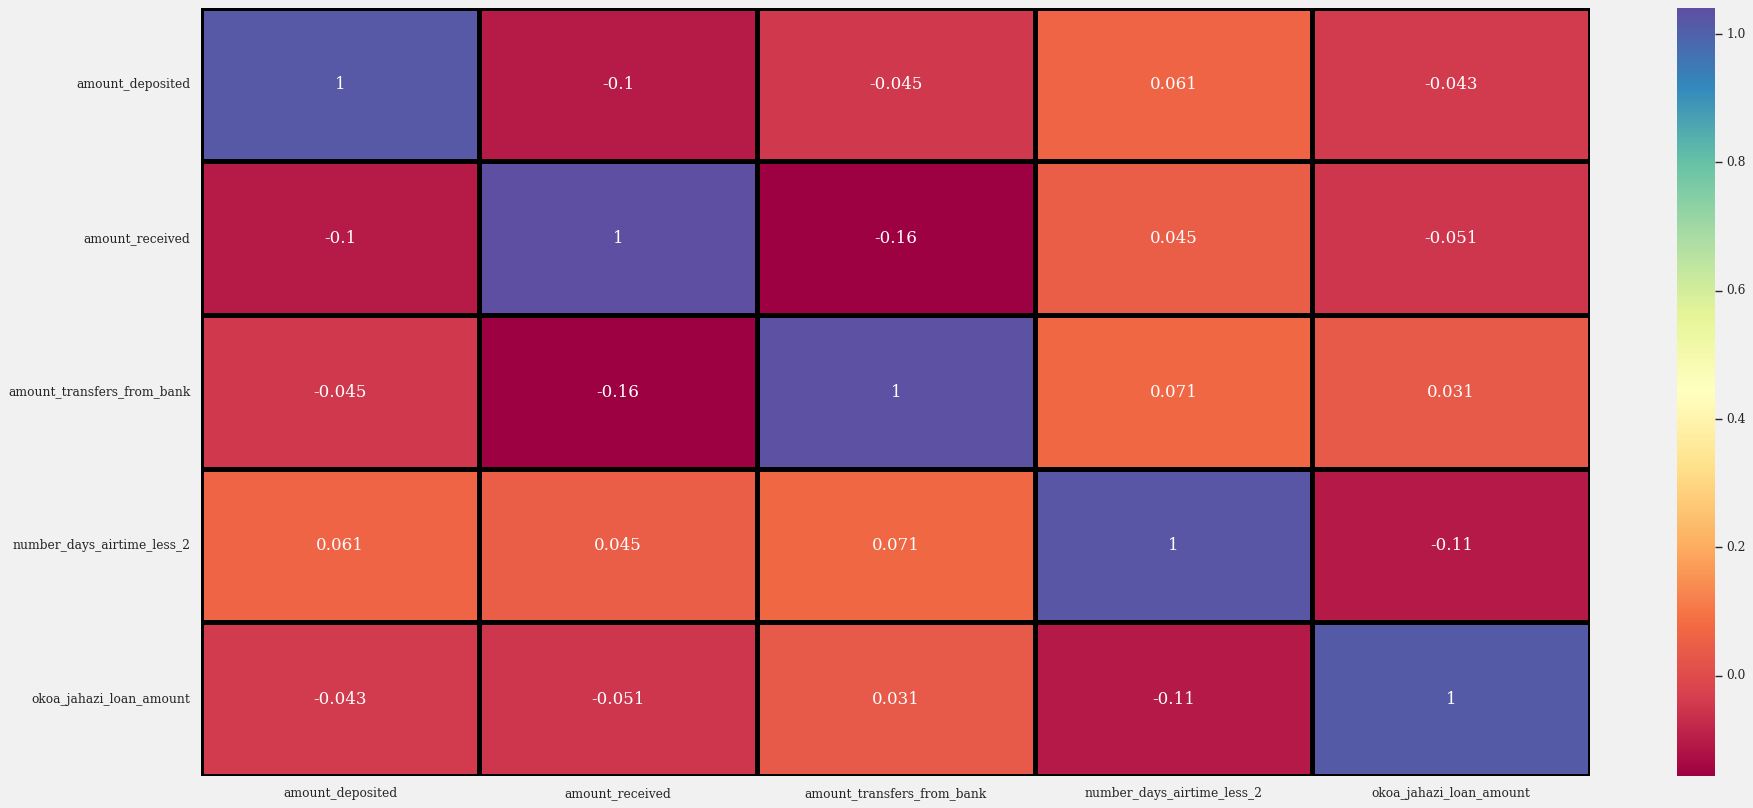

In [42]:
# # get the VIF score
new_corr = df.corr()
new_vif = pd.DataFrame(np.linalg.inv(new_corr.values), index = new_corr.index, columns = new_corr.columns)

# # plot the VIF score
plt.figure(figsize = (28,12))
sns.heatmap(new_vif, annot = True, cmap = 'Spectral', linewidths = 1.5, linecolor= 'black', linewidth=3.0, annot_kws={"size": 15})

plt.show()

**Insights:**

- **All the VIF values are close to 1, indicating low multicollinearity. Generally, VIF values greater than 5 or 10 indicate high multicollinearity.**

- **Overall, multicollinearity does not seem to be a major concern based on this VIF summary. The variables appear to have relatively low correlation with each other. No variables stand out as needing removal due to high VIF values.**

In [43]:
# one hot encoding
df = pd.get_dummies(df, drop_first=True)
df['default'] = df['default_Yes']
df.drop('default_Yes', axis=1, inplace=True)

df.head()

,amount_deposited,amount_received,amount_transfers_from_bank,number_days_airtime_less_2,okoa_jahazi_loan_amount,default
0,27590.0,53226.0,0.0,139.0,800.0,0
1,2140.0,0.0,2170.0,154.0,0.0,0
2,25700.0,37974.0,38972.0,1.0,0.0,0
3,9250.0,2180.0,0.0,64.0,0.0,0
4,102401.0,7169.0,0.0,53.0,450.0,0


In [44]:
df['default'].value_counts()

0    7940
1    1047
Name: default, dtype: int64

# <font color='goldenrod'>4. Data Modeling</font>

## Split

**Create a featute matrix named X. It should contain all the columns in the dataset except "default".**

**Create the target vector named y, which you'll use to train the model. Your target should be "default". Remember that, in most cases your target vector should be one-dimensional.**

In [45]:
# dividing our dataset into features (X) and target (y)
X = df.drop(columns=['default'],axis=1)
y = df['default']

print(X.shape)
print(y.shape)

(8987, 5)
(8987,)


In [46]:
# splitting into train and test sets 80-20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7189, 5)
(7189,)
(1798, 5)
(1798,)


**As an additional note, stratify is an option I used to evenly distribute the target variable amongst y_train and y_test. I then chose to shuffle the data to further increase the odds of randomization and prevent overfitting. I also set a random state to ensure reproducibility.**

## Data Preporcessing for Modelling

In [47]:
# num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
# cat_features = X_train.select_dtypes(include=['object']).columns

from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Standardize the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Baseline models (Vanilla Models)

In [48]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# define the train_models function
def train_models(X_train, y_train, X_test, y_test, models, cv = 5):
    """
    Trains multiple models and evaluates them using cross-validation.
    
    Parameters:
    X_train (numpy.ndarray): Training features.
    y_train (numpy.ndarray): Training labels.
    X_test (numpy.ndarray): Test features.
    y_test (numpy.ndarray): Test labels.
    models (dict): A dictionary of models to train and evaluate.
    cv (int): Number of cross-validation folds.
    
    Returns:
    dict: A dictionary of trained models.
    """
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    scores = {}
    
    # Loop through model name and model object
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Make predictions on the test data and append to y_preds
        y_preds = model.predict(X_test)
        
        # Evaluate the model and append its score to scores
        scores[name] = {
            "Train accuracy": model.score(X_train, y_train),
            "Test accuracy": model.score(X_test, y_test),
            "Precision": precision_score(y_test, y_preds),
            "Recall": recall_score(y_test, y_preds),
            "F1 score": f1_score(y_test, y_preds)
        }
        
    return scores

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


# Define the models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "XGBoost": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train the models and evaluate them using cross-validation
model_scores = train_models(X_train, y_train, X_test, y_test, models, cv = 5)

# Create a DataFrame of model scores
model_scores_df = pd.DataFrame(model_scores).T.sort_values(by='Test accuracy', ascending=False)

,Train accuracy,Test accuracy,Precision,Recall,F1 score
Logistic Regression,0.883016,0.885428,0.000000,0.000000,0.000000
SVC,0.883433,0.885428,0.000000,0.000000,0.000000
XGBoost,0.919599,0.875973,0.052632,0.004854,0.008889
Random Forest,0.998470,0.875417,0.153846,0.019417,0.034483
KNN,0.886911,0.874861,0.086957,0.009709,0.017467
Naive Bayes,0.858534,0.864294,0.120000,0.029126,0.046875
Decision Tree,0.998470,0.784205,0.138889,0.169903,0.152838


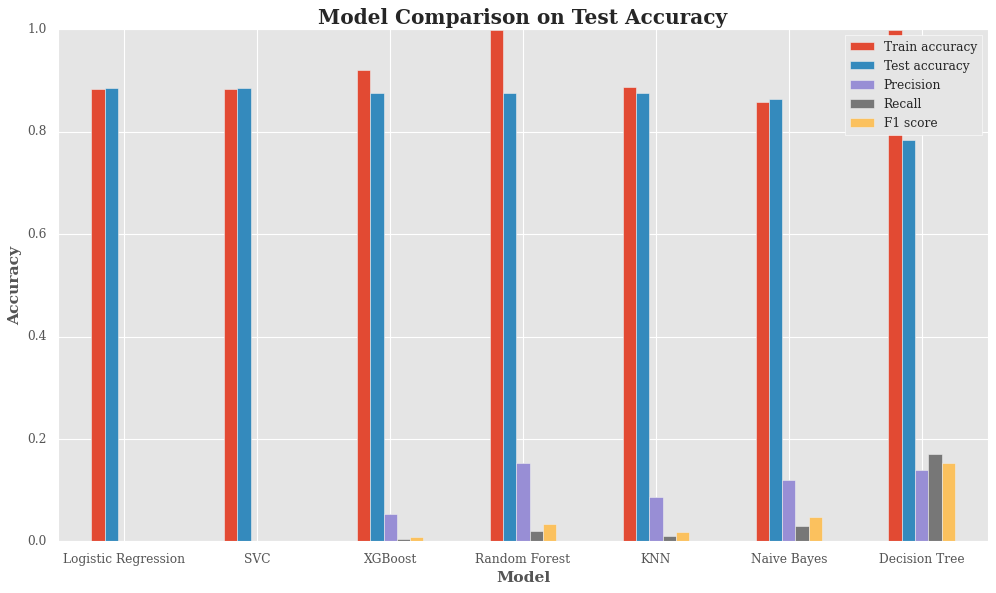

In [50]:
display(model_scores_df)

# Plot the model scores
plt.style.use('ggplot')
model_scores_df.plot(kind='bar', figsize=(15, 8))
plt.xticks(rotation=0)
plt.title("Model Comparison on Test Accuracy", size=18, fontweight='bold')
plt.xlabel('Model', size=14, fontweight='bold')
plt.ylabel('Accuracy', size=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

**Insights:**

- ***Based on the evaluation plot, it seems that none of the models are performing very well on the classification task. All of them have very low precision, recall, and F1 score, which indicate that they are not able to correctly identify the default and non-default cases. The accuracy metric is also misleading, as it does not account for the class imbalance in the data. A model that always predicts non-default will have a high accuracy, but a very poor performance on the default cases.***

- ***Among the models, the logistic regression and SVC models have the highest test accuracy, but they also have zero precision and recall, which means that they never predict default. This is not desirable, as we want to identify the default cases and take appropriate actions. The random forest model has the highest precision, recall, and F1 score among the models, but they are still very low compared to the ideal values. The random forest model also has a high train accuracy, but a lower test accuracy, which suggests that it is overfitting the training data and not generalizing well to the test data.***

- **As these are vanilla models, then my next step of action would be to try some of the approaches below to see if I can improve the performance of the models:**

    - **Feature engineering**
    - **Hyperparameter tuning**
    - **Ensemble methods**
    - **Resampling techniques**
    - **Cross-validation techniques**

## Iterate: <font color='goldenrod'>(Ensemble Model, Bagging)</font>

**Resampling - Random Over-Sampling**

In [51]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)

X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

print("X_train_over shape:" , X_train_over.shape)

# X_train_over.head()

X_train_over shape: (12696, 5)


**Baseline Accuracy**

In [52]:
acc_baseline = y_train.value_counts(normalize=True).max()

print(f"Baseline accuracy: {acc_baseline:.2%}")

Baseline accuracy: 88.30%


**Building a Random Forest Classifier**

In [53]:
clf = RandomForestClassifier(random_state=42)

**Perform cross-validation using over-sampled data**

In [54]:
from sklearn.model_selection import cross_val_score

cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs = -1)
print(cv_acc_scores)

[0.96771654 0.96652225 0.97794407 0.96809768 0.97243009]


In [55]:
print(f"Average cross-validated accuracy score: {np.mean(cv_acc_scores):.2%}")

Average cross-validated accuracy score: 97.05%


In [56]:
params = {
    "n_estimators": range(25, 100, 25),
    "max_depth": range(10, 50, 10)
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 50, 10)}

In [57]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(
    clf, 
    param_grid = params,
    cv=5, 
    n_jobs=-1, 
    verbose=1
)


model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [58]:
# Train model
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

- There are 12 candidate models being evaluated. These could be 12 different algorithms, 12 different hyperparameter configurations, etc.

- For each candidate model, 5-fold cross-validation is being used to evaluate it.

- In 5-fold cross-validation, the data is split into 5 folds or subsets. Each fold is held out in turn as a validation set, while the remaining folds are used as the training set. A model is fitted on the training set and then tested on the validation set.

- So for each candidate model, it is fitted 5 times on different combinations of training and validation sets.

- With 12 candidates and 5 folds per candidate, this results in 12 * 5 = 60 total fits or training procedures of the models.


In [59]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.533154,0.015702,0.016507,0.001488,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.817717,0.807404,0.840095,0.813312,0.804647,0.816635,0.012581,12
1,1.048962,0.039044,0.027602,0.002061,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.825197,0.816069,0.841276,0.821977,0.818826,0.824669,0.008848,11
2,1.653680,0.073744,0.039789,0.001857,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.825591,0.823946,0.845609,0.823946,0.825916,0.829002,0.008343,10
3,0.847494,0.025549,0.026008,0.013144,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.953937,0.946829,0.968098,0.952343,0.959827,0.956207,0.007246,9
4,1.604299,0.068927,0.037462,0.002189,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.957874,0.949586,0.970855,0.954313,0.965341,0.959594,0.007627,8
5,2.542623,0.106237,0.052017,0.003041,20,75,"{'max_depth': 20, 'n_estimators': 75}",0.957087,0.953919,0.971249,0.954313,0.964947,0.960303,0.006758,7
6,0.962056,0.045197,0.022913,0.001983,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.960236,0.958645,0.969279,0.963765,0.965735,0.963532,0.003813,6
7,1.821421,0.138662,0.045266,0.013184,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.966142,0.964159,0.976369,0.966916,0.970067,0.968731,0.004267,2
8,2.794015,0.123214,0.068921,0.003465,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.965354,0.964553,0.975187,0.965341,0.968098,0.967707,0.003929,4
9,0.904355,0.052084,0.021204,0.003923,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.961811,0.960221,0.972824,0.958645,0.968098,0.964320,0.005327,5


**Training Time versus n_estimators**

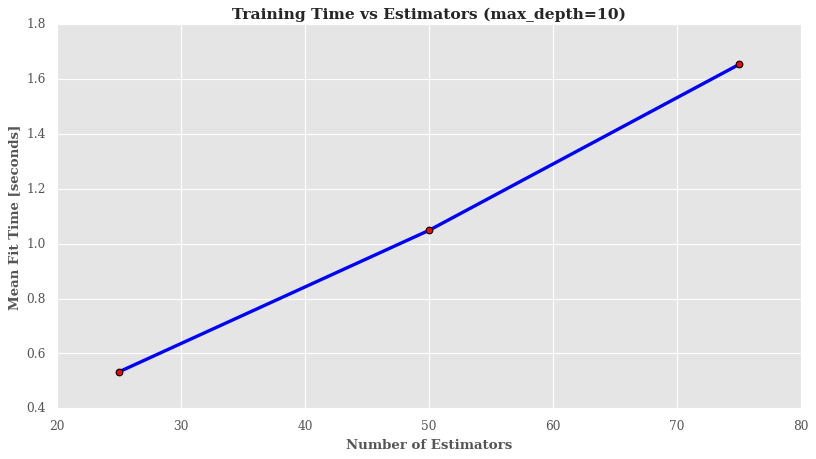

In [60]:
# Create a mask
mask = cv_results['param_max_depth'] == 10

# Plot fit timw vs n_estimators
plt.figure(figsize=(12, 6))
plt.plot(
    cv_results[mask]['param_n_estimators'],
    cv_results[mask]['mean_fit_time'],
    marker='o', 
    color='blue', 
    linewidth=3.0, 
    markerfacecolor='red', 
    markeredgecolor='black',
    markeredgewidth=1.0)

# Add labels and title
plt.xlabel('Number of Estimators', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Mean Fit Time [seconds]', fontsize=12, fontweight='bold', fontfamily='serif')
plt.title('Training Time vs Estimators (max_depth=10)', fontsize=14, fontweight='bold', fontfamily='serif')

# Show plot
plt.show()

**There is a clear relationship between the number of estimators and the training time. As the number of estimators increases, the training time increases. This makes sense, as the model has to fit more trees.**

**Training Time versus Max_Depth**

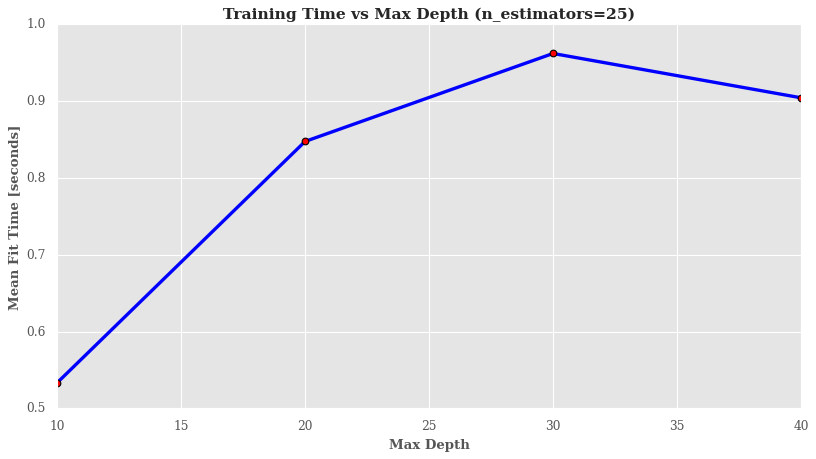

In [61]:
# Create mask
mask = cv_results['param_n_estimators'] == 25

# Plot fit time vs max_depth
plt.figure(figsize=(12, 6))

plt.plot(
    cv_results[mask]['param_max_depth'],
    cv_results[mask]['mean_fit_time'],
    marker='o', 
    color='blue', 
    linewidth=3.0, 
    markerfacecolor='red', 
    markeredgecolor='black',
    markeredgewidth=1.0)

# Add labels and title
plt.xlabel('Max Depth', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Mean Fit Time [seconds]', fontsize=12, fontweight='bold', fontfamily='serif')
plt.title('Training Time vs Max Depth (n_estimators=25)', fontsize=14, fontweight='bold', fontfamily='serif')

# Show plot
plt.show()

**There is a general upward trend between max_depth and training time. As max_depth increases, the training time increases.**

In [62]:
print(model.best_params_)

print(model.best_score_)

print(model.best_estimator_)

{'max_depth': 40, 'n_estimators': 50}
0.9690455973428687
RandomForestClassifier(max_depth=40, n_estimators=50, random_state=42)


## Evaluate

In [63]:
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test, y_test)

print(f"Train accuracy: {acc_train:.2%}")
print(f"Test accuracy: {acc_test:.2%}")

Train accuracy: 99.87%
Test accuracy: 84.76%


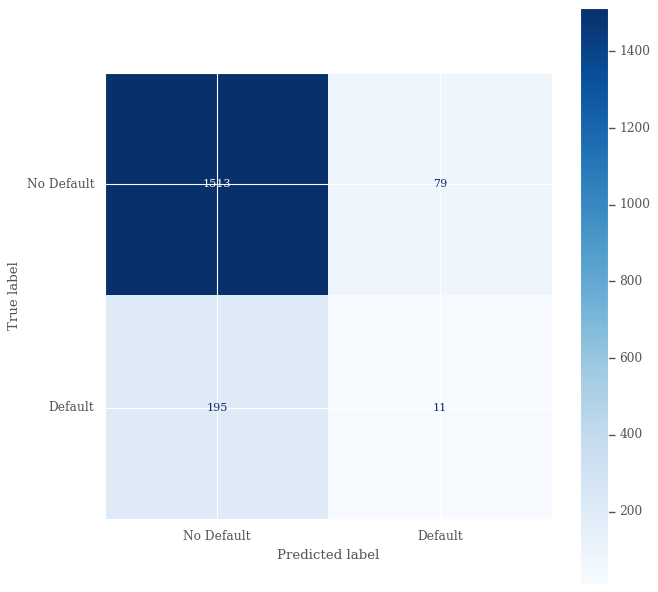

In [64]:
# import confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)), display_labels=['No Default', 'Default']).plot(cmap='Blues');

In [65]:
# put the accuracy score, precision, recall and f1 score in a dataframe
metrics_df = pd.DataFrame({'accuracy': [acc_train, acc_test],
                           'precision': [precision_score(y_train_over, model.predict(X_train_over)), precision_score(y_test, model.predict(X_test))],
                           'recall': [recall_score(y_train_over, model.predict(X_train_over)), recall_score(y_test, model.predict(X_test))],
                           'f1': [f1_score(y_train_over, model.predict(X_train_over)), f1_score(y_test, model.predict(X_test))]},
                          index=['train', 'test'])

metrics_df

,accuracy,precision,recall,f1
train,0.998740,0.997486,1.000000,0.998741
test,0.847608,0.122222,0.053398,0.074324


In [66]:
# import classification report
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1592
           1       0.12      0.05      0.07       206

    accuracy                           0.85      1798
   macro avg       0.50      0.50      0.50      1798
weighted avg       0.80      0.85      0.82      1798



- The model achieved an overall accuracy of 0.85. 

- For the Non-Default class:
  - Precision is 0.89, meaning 89% of examples the model predicted as Non-Default were actually Non-Default.
  - Recall is 0.95, meaning the model correctly identified 95% of true Non-Default examples.
  - F1-score is 0.92, indicating a good balance of precision and recall.

- For the Default class:
  - Precision is low at 0.13, meaning only 13% of examples predicted as Default were truly Default.
  - Recall is very low at 0.05, meaning the model only detected 5% of true Default examples.
  - F1-score is 0.08, indicating poor performance on the Default class.

- The macro average scores consider both classes equally and show that overall, precision and recall are balanced at 0.51 and 0.50.

- The weighted average scores account for class imbalance, showing higher weighted precision of 0.80 and recall of 0.85.

In summary, the model performs well on the majority Non-Default class but very poorly on the minority Default class. Improving recall for the Default class could improve the model's ability to detect risky defaults. Oversampling or tweaking the classification threshold may help address the class imbalance.

In [67]:
# Adjust the classification threshold to 0.3
y_pred_adj = np.where(model.predict_proba(X_test)[:,1] > 0.2, 1, 0)

# Print the adjusted classification report
print(classification_report(y_test, y_pred_adj))

              precision    recall  f1-score   support

           0       0.89      0.69      0.77      1592
           1       0.12      0.33      0.17       206

    accuracy                           0.65      1798
   macro avg       0.50      0.51      0.47      1798
weighted avg       0.80      0.65      0.71      1798



# <font color='goldenrod'>5. Communicate Results</font>

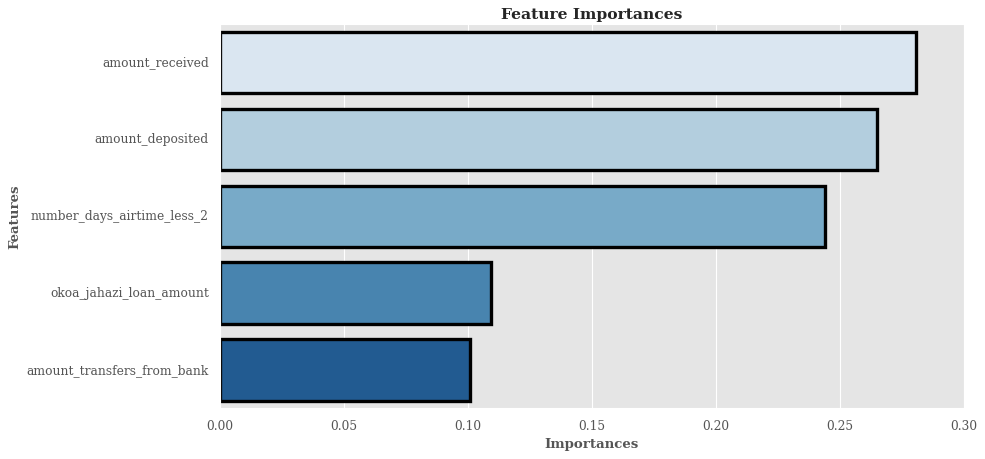

In [68]:
# Get importances
importances = model.best_estimator_.feature_importances_

# Create a DataFrame using a Dictionary
feature_dict = {'features': X.columns, 'importances': importances}
feature_df = pd.DataFrame(feature_dict).sort_values(by='importances', ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(y='features', x='importances', data=feature_df, palette='Blues', edgecolor='black', linewidth=3.0)

plt.yticks(rotation=0) 

plt.title('Feature Importances', fontsize=14, fontweight='bold', fontfamily='serif')

plt.xlabel('Importances', fontsize=12, fontweight='bold', fontfamily='serif')  
plt.ylabel('Features', fontsize=12, fontweight='bold', fontfamily='serif')

plt.show()

**The features are related to the amount of money received, deposited, transferred, or borrowed by customers, as well as the number of days they have less than 2 units of airtime. The graph indicates that the most important feature is `amount_received`. The second most important feature is `amount_deposited`. The third most important feature is `number_days_airtime_less_2`. The least important features are `okoa_jahazi_loan_amount` and `amount_transfers_from_bank`. The graph also shows that the feature importances sum up to 1, which means that they are normalized and represent the relative contribution of each feature to the prediction model.**

# <font color='goldenrod'>6. Summary of Findings</font>

- **There are significantly more accounts that have been repaid on time than accounts that have defaulted. This is a good thing for lenders, as it means that they are more likely to get their money back. It is also a good thing for borrowers, as it means that they are more likely to be able to qualify for loans in the future. This also raises the issue of class imbalance between the negative and positive class.**

- **The distribution of loan age is skewed right, with most customers having loans less than 90 days old. This means that most customers have recently taken out loans. This could be because the company is new and is still growing its customer base, or it could be because the company offers short-term loans.**

- **The variable number_days_airtime<2 displays characteristics of a mixture distribution. This means that the distribution of this variable is likely made up of two or more different distributions. For example, imagine a distribution of the number of days that customers have gone without purchasing airtime. This distribution might be a mixture of two distributions: one distribution for customers who regularly purchase airtime and another distribution for customers who rarely purchase airtime.**

- **The values for the variables `amount_deposited`, `amount_received`, `amount_transfers_from_bank`, `mpesa_credits`, and `okoa_jahazi_loan_amount` are centered around zero and skew to the right side of the distribution. This means that the majority of values for these variables are close to zero, but there are more large positive values than large negative values. For example, imagine a distribution of customer account balances, where most customers have balances close to zero, but there are a few customers with very large balances. This distribution would be skewed to the right.**

**Mobile money transactions are more common on weekdays than on weekends, with Tuesdays having the highest number of transactions. This means that people are more likely to send and receive money using their mobile phones during the workweek, when they are more likely to be making purchases or paying bills. On the other hand, mobile money transactions are less common on weekends, when people are more likely to be relaxing or spending time with their families.**

**Here are some possible explanations for why mobile money transactions are more common on weekdays than on weekends:**

- People are more likely to be working or running errands on weekdays. This means that they are more likely to need to send or receive money to pay for goods and services.
- Businesses are more likely to be open on weekdays. This means that people have more opportunities to use mobile money to make payments.
- People may be more likely to use mobile money to pay for bills on weekdays. This is because many bills are due on or around the first of the month, which typically falls on a weekday.

**The daily average amount of transfers for the period February shoes an overall upward trend. There are a few possible explanations for this upward trend. One possibility is that the bank was running a promotion or offering a special incentive for customers to make transfers. Another possibility is that the bank's customers were simply becoming more comfortable with making transfers online or through mobile banking. It is also possible that there was an increase in the overall number of transactions taking place during this period.**

**The average loan amount by loan age, for both loans that have defaulted and loans that have not defaulted shows that the average loan amount for both types of loans increases with loan age. This is likely because borrowers are able to qualify for larger loans as they build up their credit history and become more established financially.**

**However, the average loan amount for defaulted loans is consistently higher than the average loan amount for non-defaulted loans. This suggests that borrowers who take out larger loans are more likely to default. This may be because they are more likely to be overextended financially and less likely to be able to withstand unexpected financial shocks.**

**The graph also shows that the gap between the average loan amount for defaulted loans and the average loan amount for non-defaulted loans widens with loan age. This suggests that the risk of default increases for larger loans over time.**

**Overall, the graph suggests that lenders should be careful when making large loans, especially to borrowers with limited credit history. Lenders should also carefully consider the borrower's financial situation and ability to repay the loan before making a decision.**

**The average amount deposited by customers who have defaulted or not on their loans shows that customers who have not defaulted have deposited more money on average than those who have defaulted. The difference between the two groups is about KES 8,000. This is a large difference, so this variable could be a good predictor of whether or not a customer will default on their loan.**

**The average number of days that customers have less than 2 units of airtime left on their phones, based on whether they defaulted on their loans or not suggests that customers who defaulted on their loans had more days with low airtime than those who did not. This could imply that customers who default on their loans are more likely to have financial difficulties or lower income. However, it is also possible that customers who default on their loans are more likely to use their airtime for mobile money transactions, which would cause them to run out of airtime more quickly.**

**Customers who have not defaulted on their loans tend to receive more money than customers who have defaulted on their loans. This could be because customers who receive more money are more likely to be able to pay back their loans. It could also be because customers who receive more money are more likely to be able to qualify for larger loans.**

**The average amount of money transferred from the bank by customers who have defaulted or not defaulted on their loans indicates that customers who have not defaulted on their loans transfer more money from the bank than those who have defaulted. The difference between the two groups is about KES 1,828.**

**The average Okoa Jahazi loan amount for customers who defaulted or not on their loans indicates that customers who defaulted had a slightly higher average loan amount than those who did not. The difference is about 45 shillings.**

# <font color='goldenrod'>7. Recommendations</font>

- ***Lenders should be careful when making large loans, especially to borrowers with limited credit history. This is because the data shows that borrowers who take out larger loans are more likely to default, especially over time.***

- ***Lenders should also carefully consider the borrower's financial situation and ability to repay the loan before making a decision. This means looking at factors such as the borrower's income, debt-to-income ratio, and credit score.***

- ***Lenders could use the average amount deposited by customers as a predictor of whether or not a customer is likely to default on their loan. Customers who have not defaulted on their loans have deposited more money on average than those who have defaulted.***

- ***Lenders could also use the average number of days that customers have less than 2 units of airtime left on their phones as a predictor of whether or not a customer is likely to default on their loan. Customers who defaulted on their loans had more days with low airtime than those who did not. This suggests that customers who default on their loans may be more likely to have financial difficulties or lower income.***

- ***Lenders could also consider the average amount of money transferred from the bank and the average Okoa Jahazi loan amount as predictors of whether or not a customer is likely to default on their loan. Customers who have not defaulted on their loans transfer more money from the bank and have slightly lower Okoa Jahazi loan amounts than those who have defaulted.***

- ***Offer financial education programs to borrowers. This can help borrowers to better understand their finances and how to manage their debt.***

- ***Provide loan repayment assistance programs to borrowers who are struggling to repay their loans. This could include things like loan modification or forbearance.***

- ***Partner with other financial institutions to share data and insights on borrowers. This can help lenders to make more informed decisions about who to lend to and how much to lend.***



## <font color='goldenrod'>7. Challenging your Solution</font>

**Class imbalance:** 
The dataset contains a large number of non-default cases and a small number of default cases. This means that the model will be biased towards predicting non-default cases, which may lead to poor performance on the default cases. To address this issue, you can use resampling techniques to balance the classes in the dataset. This can be done by either oversampling the minority class or undersampling the majority class. Some common resampling techniques include SMOTE, ADASYN, and Random Oversampling.

Use cost-sensitive learning algorithms. These algorithms take into account the cost of misclassifying each class and try to minimize the overall cost. Some common cost-sensitive learning algorithms include cost-sensitive SVM and cost-sensitive decision trees.
Use ensemble learning. Ensemble learning algorithms combine the predictions of multiple machine learning models to improve the overall accuracy. Some common ensemble learning algorithms include random forests, gradient boosting machines, and XGBoost.

**Skewed distribution of loan age:**

Use transformation techniques to normalize the distribution of the loan age variable. This can be done by using a logarithmic transformation or a square root transformation. Use machine learning algorithms that are robust to skewed distributions, such as decision trees and random forests.

**Mixture distribution of number_days_airtime<2:**

Use clustering to identify the different groups of customers in the data. Once the customers have been clustered, you can train a separate machine learning model for each cluster. Use model ensembles to combine the predictions of multiple machine learning models, each trained on a different subset of the data. This can help to improve the accuracy of the overall prediction.

**Skewed distributions of amount_deposited, amount_received, amount_transfers_from_bank, mpesa_credits, and okoa_jahazi_loan_amount:**

Use transformation techniques to normalize the distributions of these variables. This can be done by using a logarithmic transformation or a square root transformation. Use machine learning algorithms that are robust to skewed distributions, such as decision trees and random forests.

**More mobile money transactions on weekdays than weekends:**

Use time series analysis to identify patterns in the mobile money transaction data. This can help you to understand how the number of transactions varies over time, including on weekdays versus weekends. Use machine learning algorithms to predict the number of mobile money transactions on a given day. This can be useful for businesses that need to forecast demand for their products and services.
